
<Html>
    <body>
        <h1>Stock Market Prediction</h1>
        <h2>Stock Market Data From Yahoo Finance</h2><br>
        <p>Have you ever wondered what would happen if one could actually predict the stock market and tell what would happen in the upcomming days.<br>
        Thinking about stock market prediction one could always question how is it possible to predict stock market.<br>
        Let me clear your confusion.<br>
        One just cannot predict the stock market with a 100% surety about whats coming next but that is the thing what all the big data scientist are currently working on. <br>
        We can actually predict what could possibly happen based on the current trend of hoe the company is growing and how well it is performing in the market by analysing the charts and using mathematical models converting it into codes and then showing the output<br>
        In this Project I tried to do the same and predict the Stock Market of some of the tech Giants accross the globe<br></p>
    </body>
</html>

In [1]:
from __future__ import division

In [2]:
# For Data Processing
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

# Data Visualization
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [51]:
#Extrating dataset from Yahoo Finance
#List of Tech campanies stocks for analytics
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

# Set DataFrame as the Stock Ticker
#globals()['NFLX'] = DataReader('NFLX','yahoo',start,end)
NFLX = pd.read_csv('APOLLOHOSP.BO.csv')


def dropna(arr, *args, **kwarg):
    #assert isinstance(arr, np.ndarray)
    dropped=pd.DataFrame(arr).dropna(*args, **kwarg).values
    if arr.ndim==1:
        dropped=dropped.flatten()
    return dropped


print(dropna(NFLX))

NFLX['Close'] = NFLX['Close'][~pd.isnull(NFLX['Close'])]
NFLX['Open'] = NFLX['Open'][~np.isnan(NFLX['Open'])]
NFLX['High'] = NFLX['High'][~np.isnan(NFLX['High'])]
NFLX['Low'] = NFLX['Low'][~np.isnan(NFLX['Low'])]
NFLX['Volume'] = NFLX['Volume'][~np.isnan(NFLX['Volume'])]

[['9/10/2013' 869.0 876.0 ... 871.0499880000001 850.405823 27061]
 ['9/11/2013' 872.0 879.0 ... 865.5 844.9874269999999 10253]
 ['9/12/2013' 870.099976 873.400024 ... 867.5 846.9400019999999 7050]
 ...
 ['3/28/2019' 1155.0 1191.949951 ... 1184.5 1184.5 35000]
 ['4/1/2019' 1220.0 1280.0 ... 1267.449951 1267.449951 41624]
 ['4/2/2019' 1269.5 1283.199951 ... 1254.900024 1254.900024 20066]]


In [47]:
NFLX.head()

Date        Open        High         Low       Close   Adj Close  \
0  9/10/2013  869.000000  876.000000  851.000000  871.049988  850.405823   
1  9/11/2013  872.000000  879.000000  842.000000  865.500000  844.987427   
2  9/12/2013  870.099976  873.400024  863.000000  867.500000  846.940002   
3  9/13/2013  870.000000  870.000000  852.000000  858.000000  837.665161   
4  9/16/2013  863.849976  866.700012  854.549988  856.150024  835.859009   

    Volume  
0  27061.0  
1  10253.0  
2   7050.0  
3   8054.0  
4   5628.0

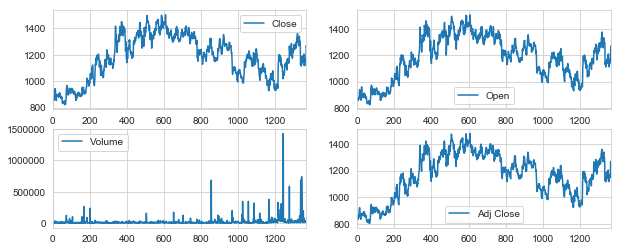

In [55]:
#ploting all the columns of My Dataset 
plt.figure()
plt.subplot(2,2,1)
NFLX['Close'].plot(legend=True, figsize=(10,4))
plt.subplot(222)
NFLX['Open'].plot(legend=True, figsize=(10,4))
plt.subplot(223)
NFLX['Volume'].plot(legend=True, figsize=(10,4))
plt.subplot(224)
NFLX['Adj Close'].plot(legend=True, figsize=(10,4))

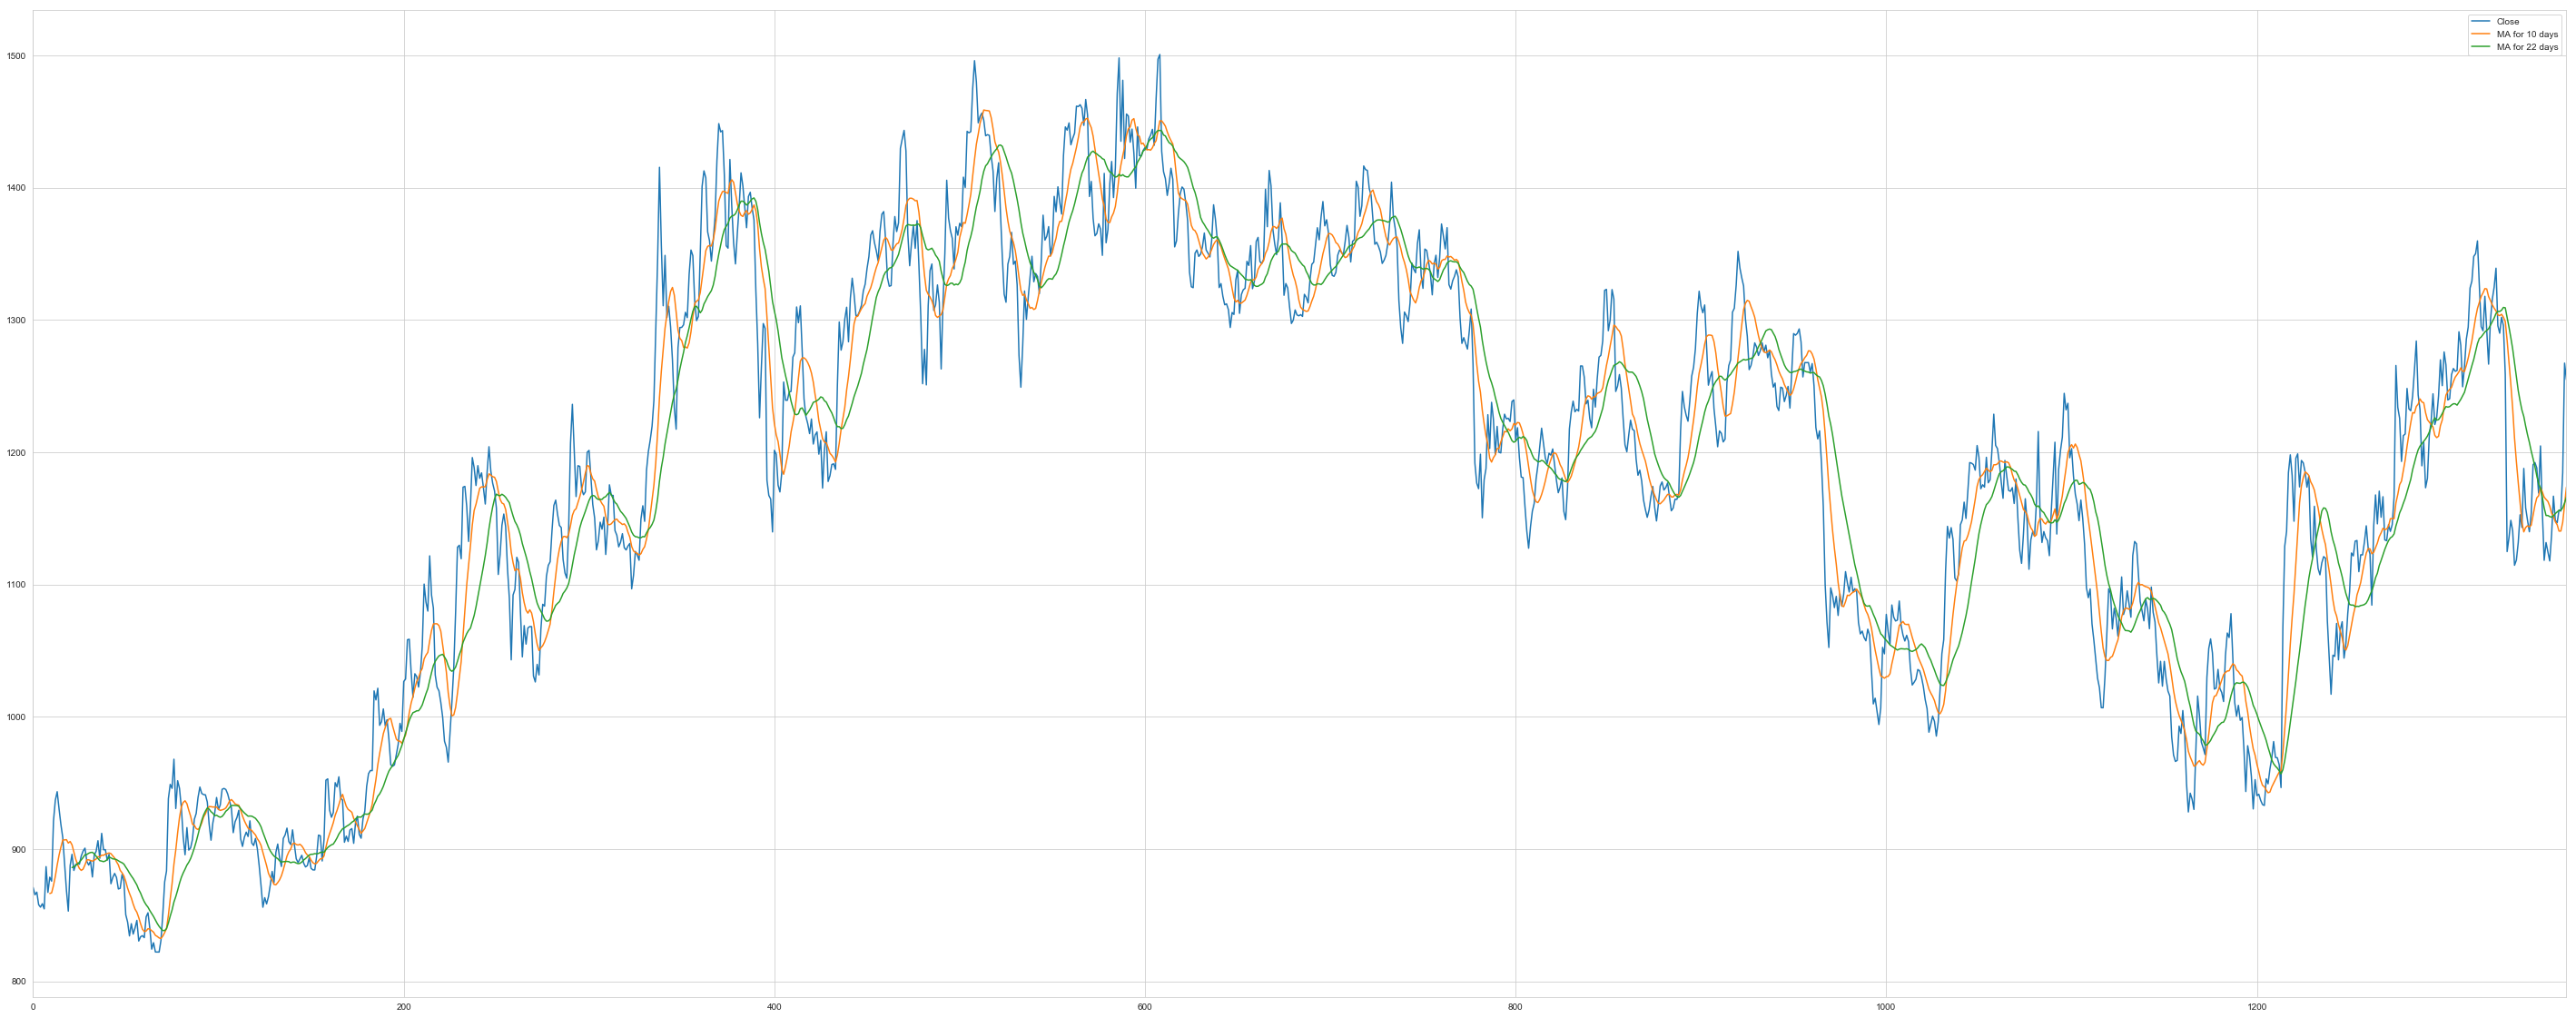

In [54]:
#1 Moving Average(MA)
MA_day = [10,22]
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    NFLX[column_name] = NFLX['Close'].rolling(ma).mean()  #pd.rolling_mean(AAPL['Close'],ma)
    
NFLX[['Close','MA for 10 days','MA for 22 days']].plot(subplots=False,figsize=(50,20))

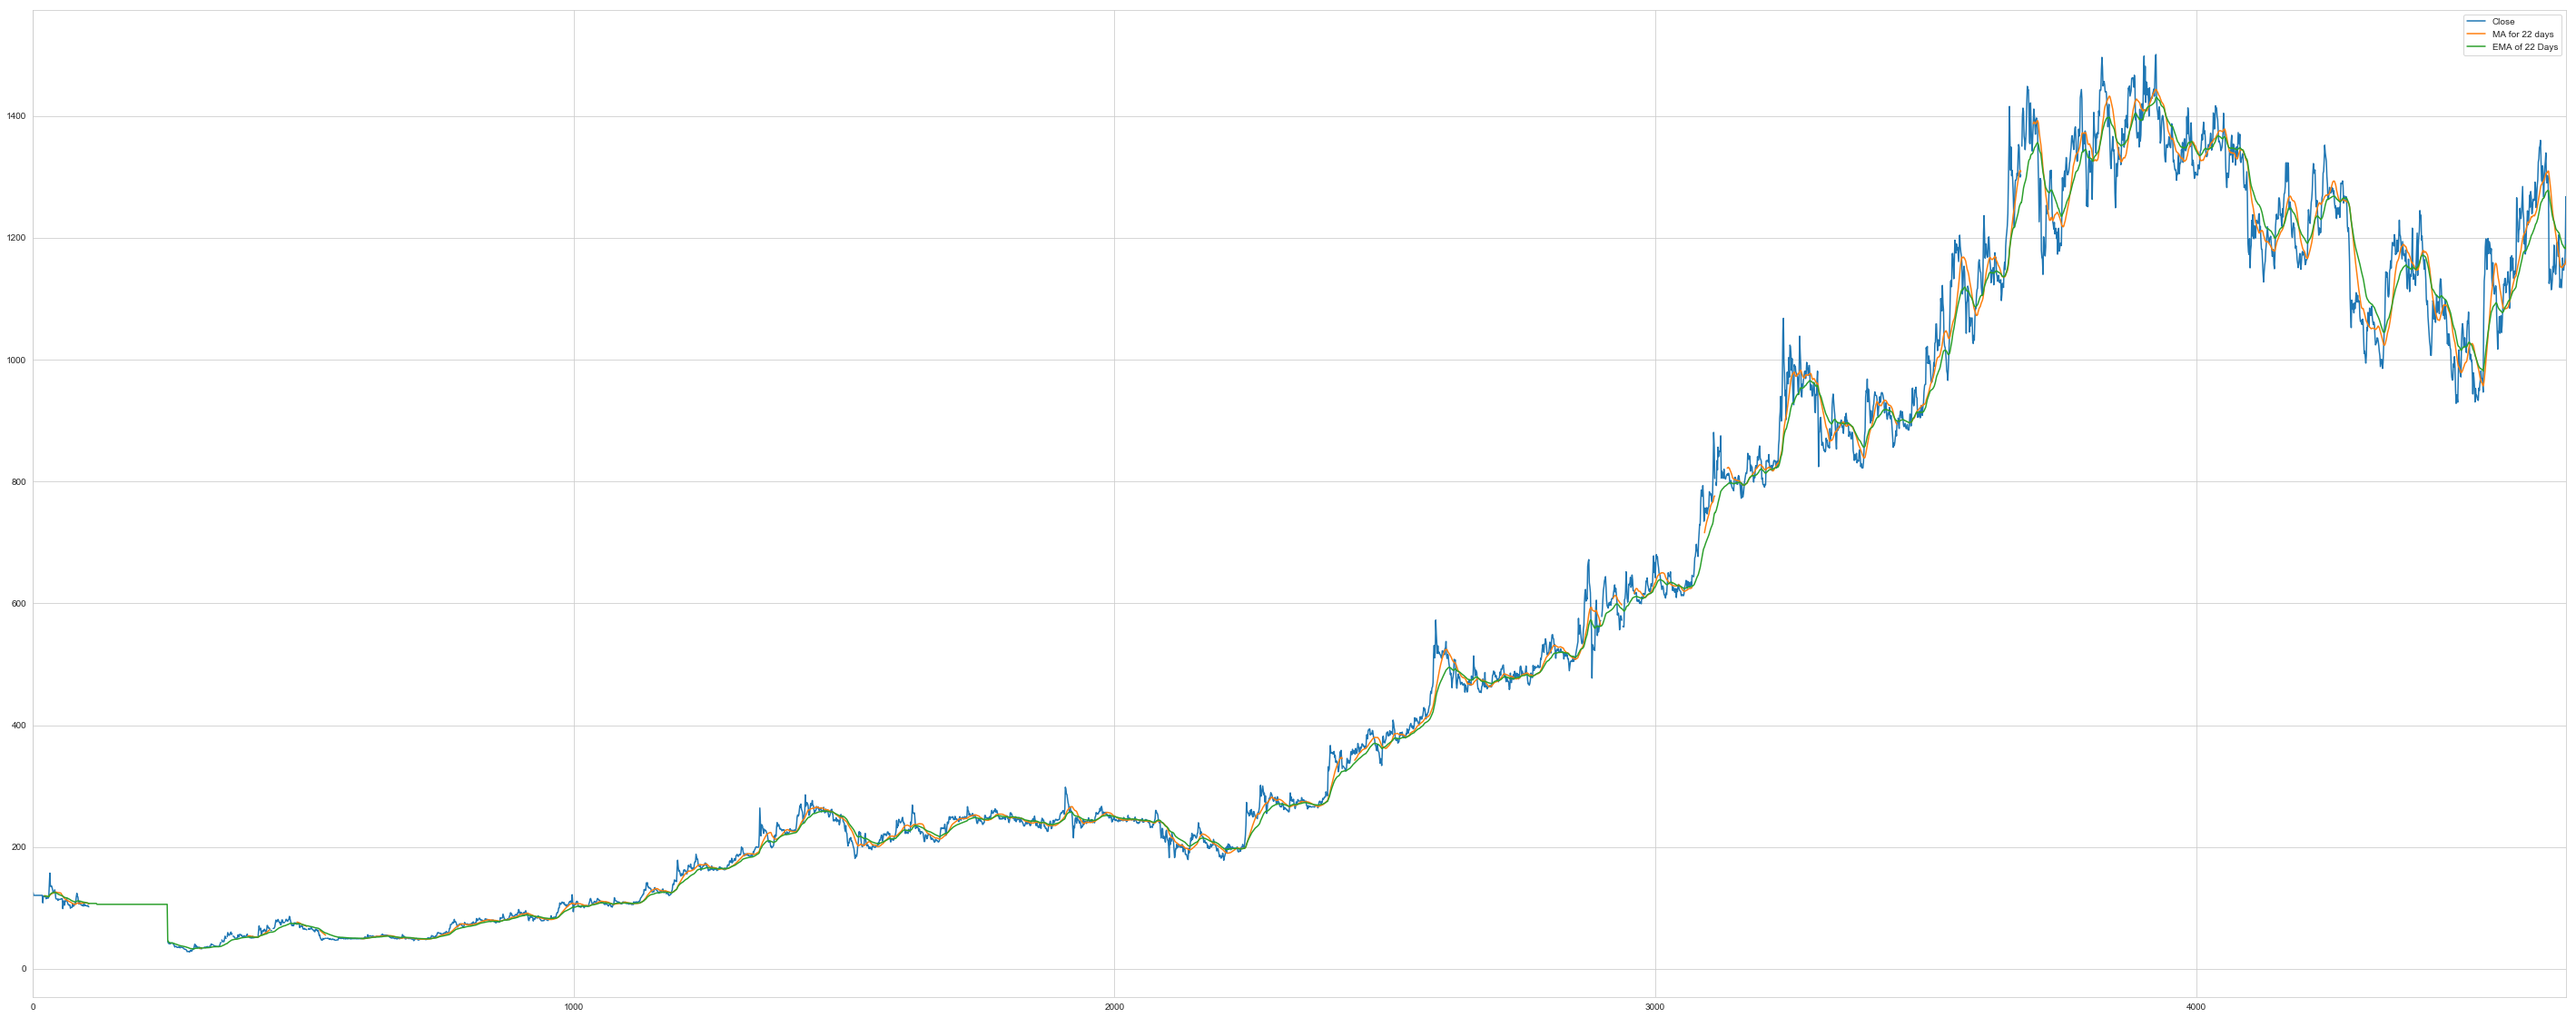

In [32]:
#2 Exponential Moving Average (EMA)
emaPeriod = 22
NFLX['EMA of 22 Days'] = NFLX['Close'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX[['Close','MA for 22 days','EMA of 22 Days']].plot(subplots=False,figsize=(50,20))

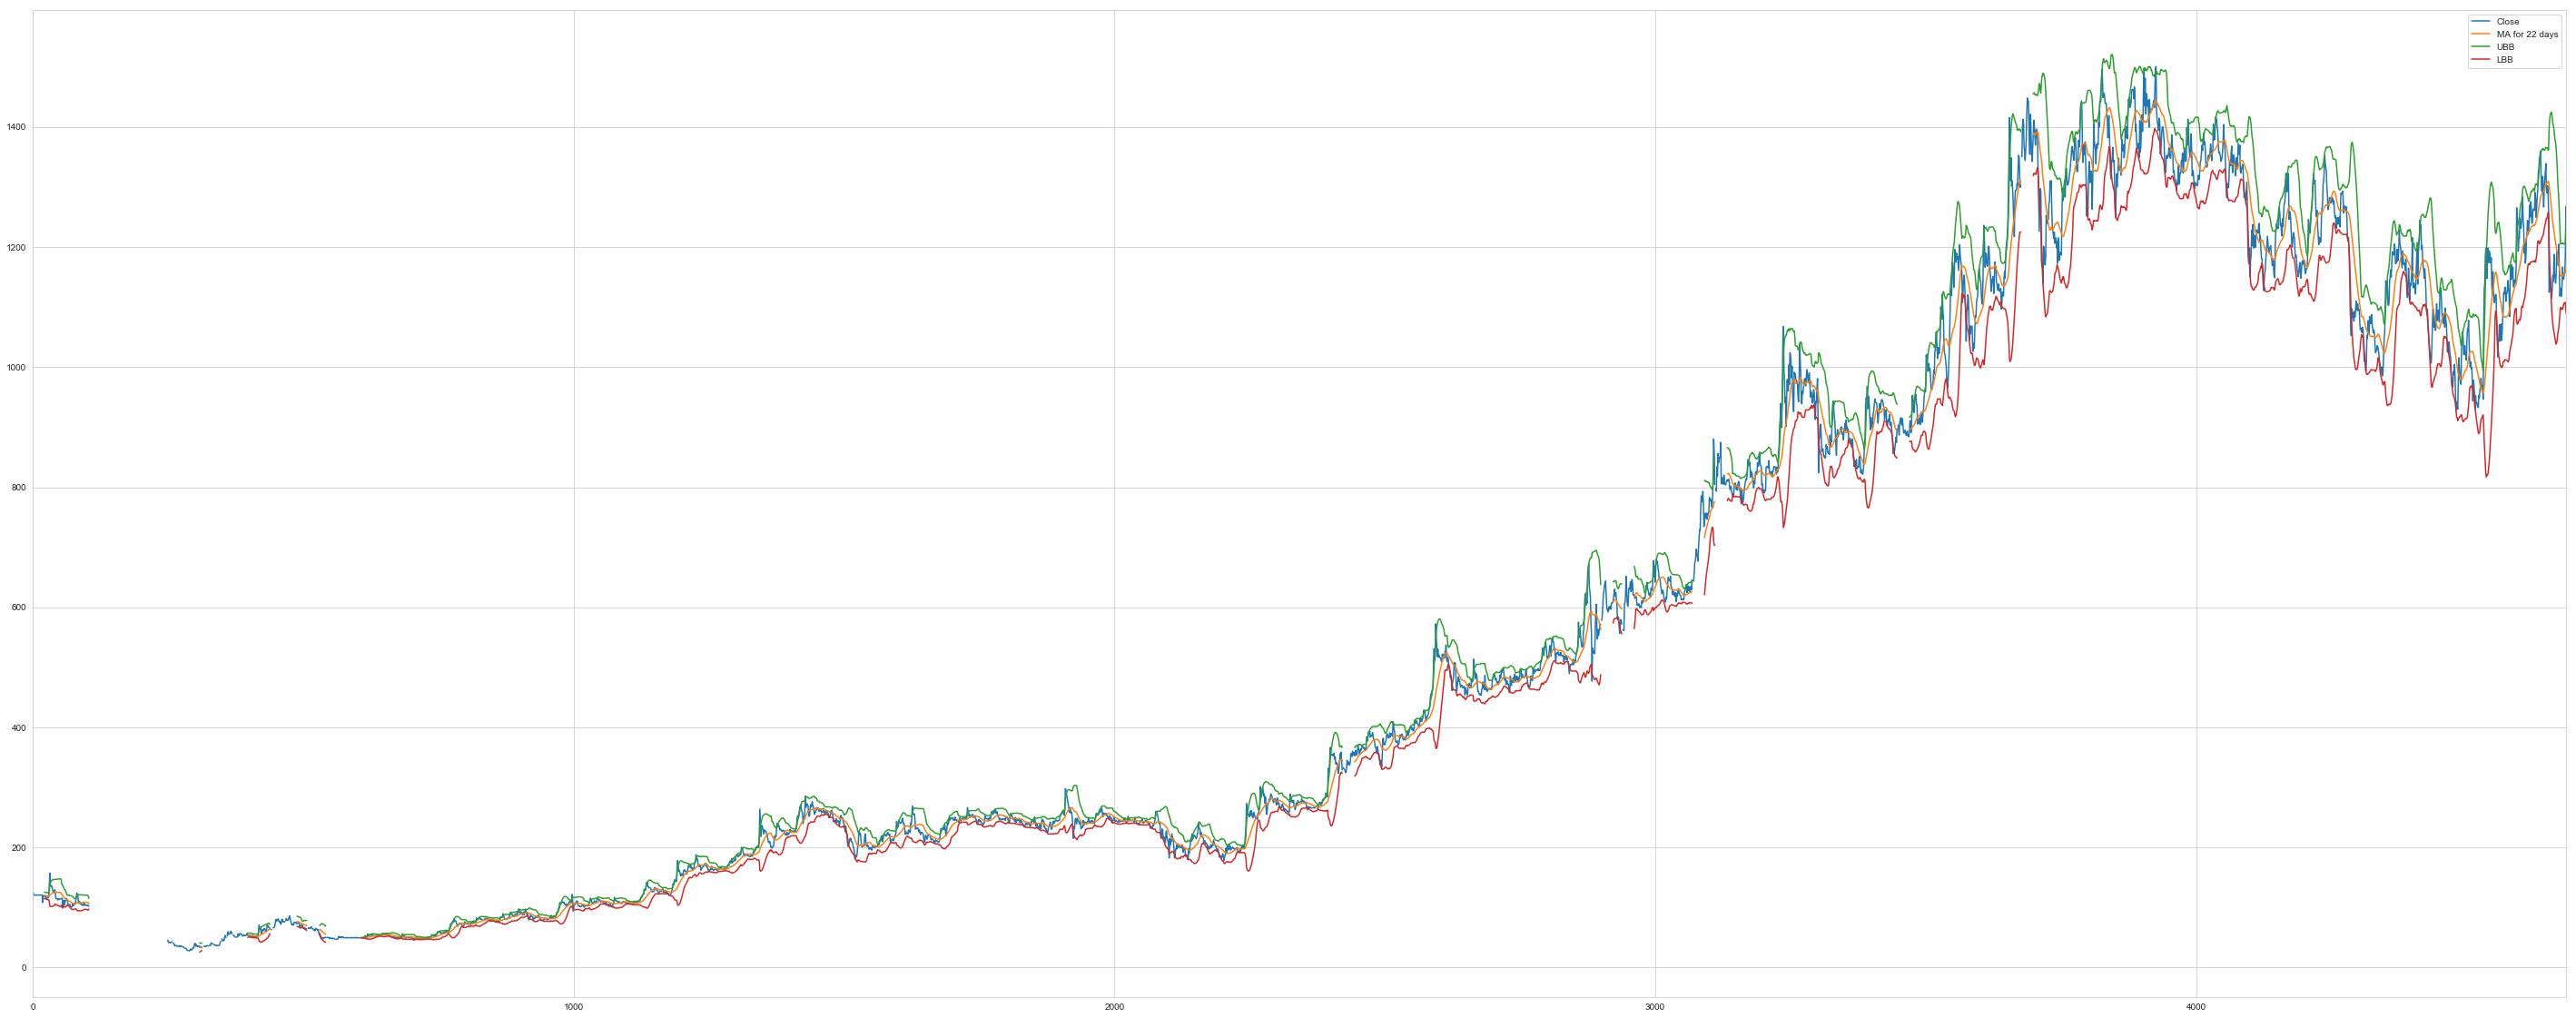

In [33]:
#3 Bollinger Bands (BB)
SD = NFLX['Close'].rolling(22).std()
NFLX['UBB'] = NFLX['MA for 22 days'] + (2*SD)
NFLX['LBB'] = NFLX['MA for 22 days'] - (2*SD)
NFLX[['Close','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

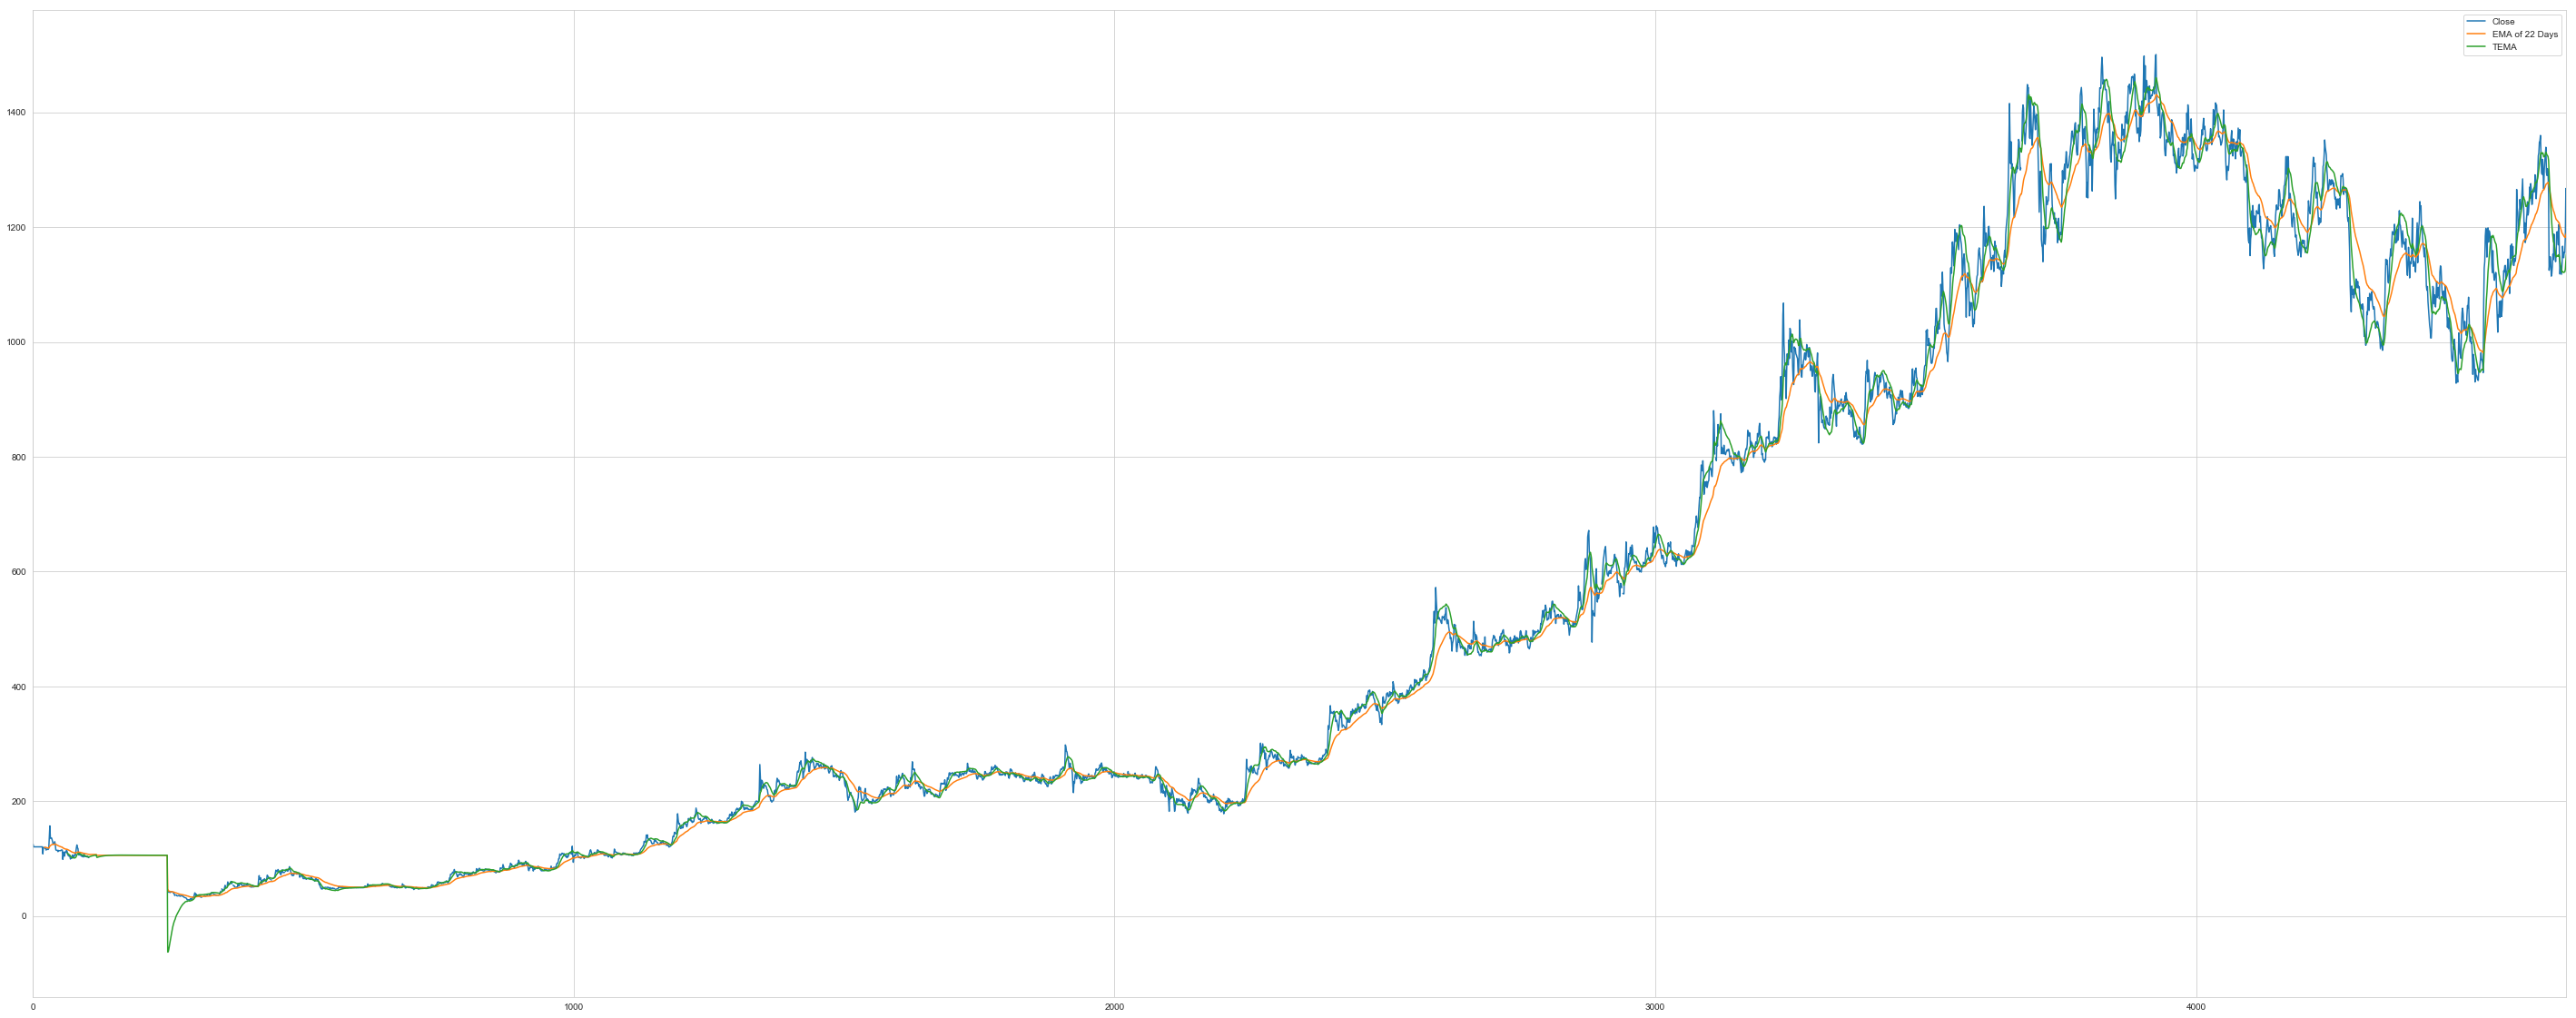

In [34]:
#4 Triple Exponential Moving Average (TEMA)
NFLX['EMA2'] = NFLX['EMA of 22 Days'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX['EMA3'] = NFLX['EMA2'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX['TEMA'] = 3*NFLX['EMA of 22 Days'] - 3*NFLX['EMA2'] + NFLX['EMA3']
NFLX[['Close','EMA of 22 Days','TEMA']].plot(subplots=False,figsize=(50,20))

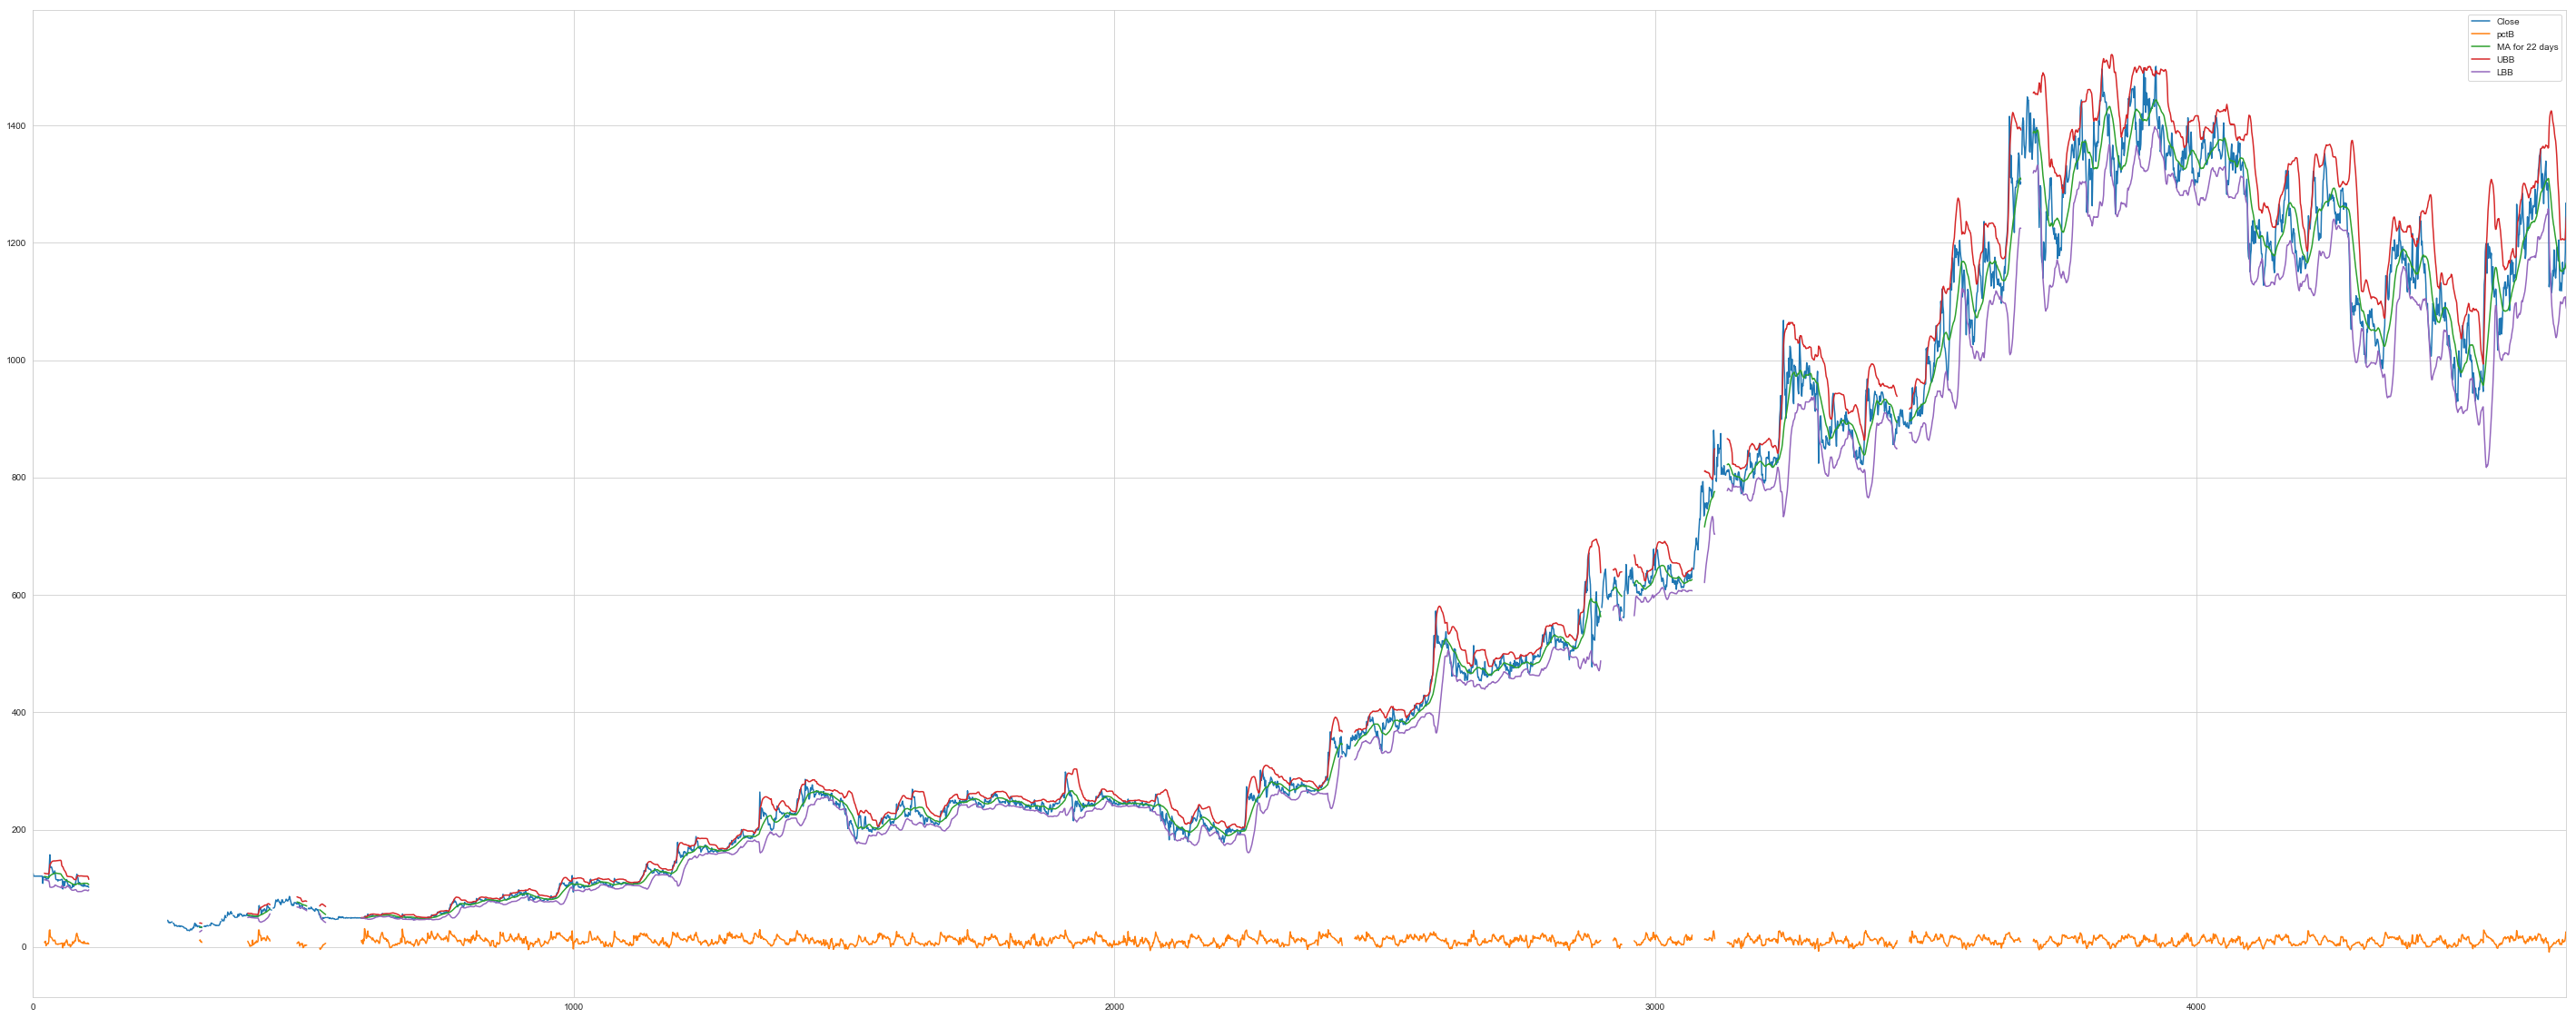

In [11]:
#5 %b
NFLX['pctB'] = 20 * (NFLX['Close'] - NFLX['LBB']) / (NFLX['UBB'] - NFLX['LBB'])
NFLX[['Close','pctB','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

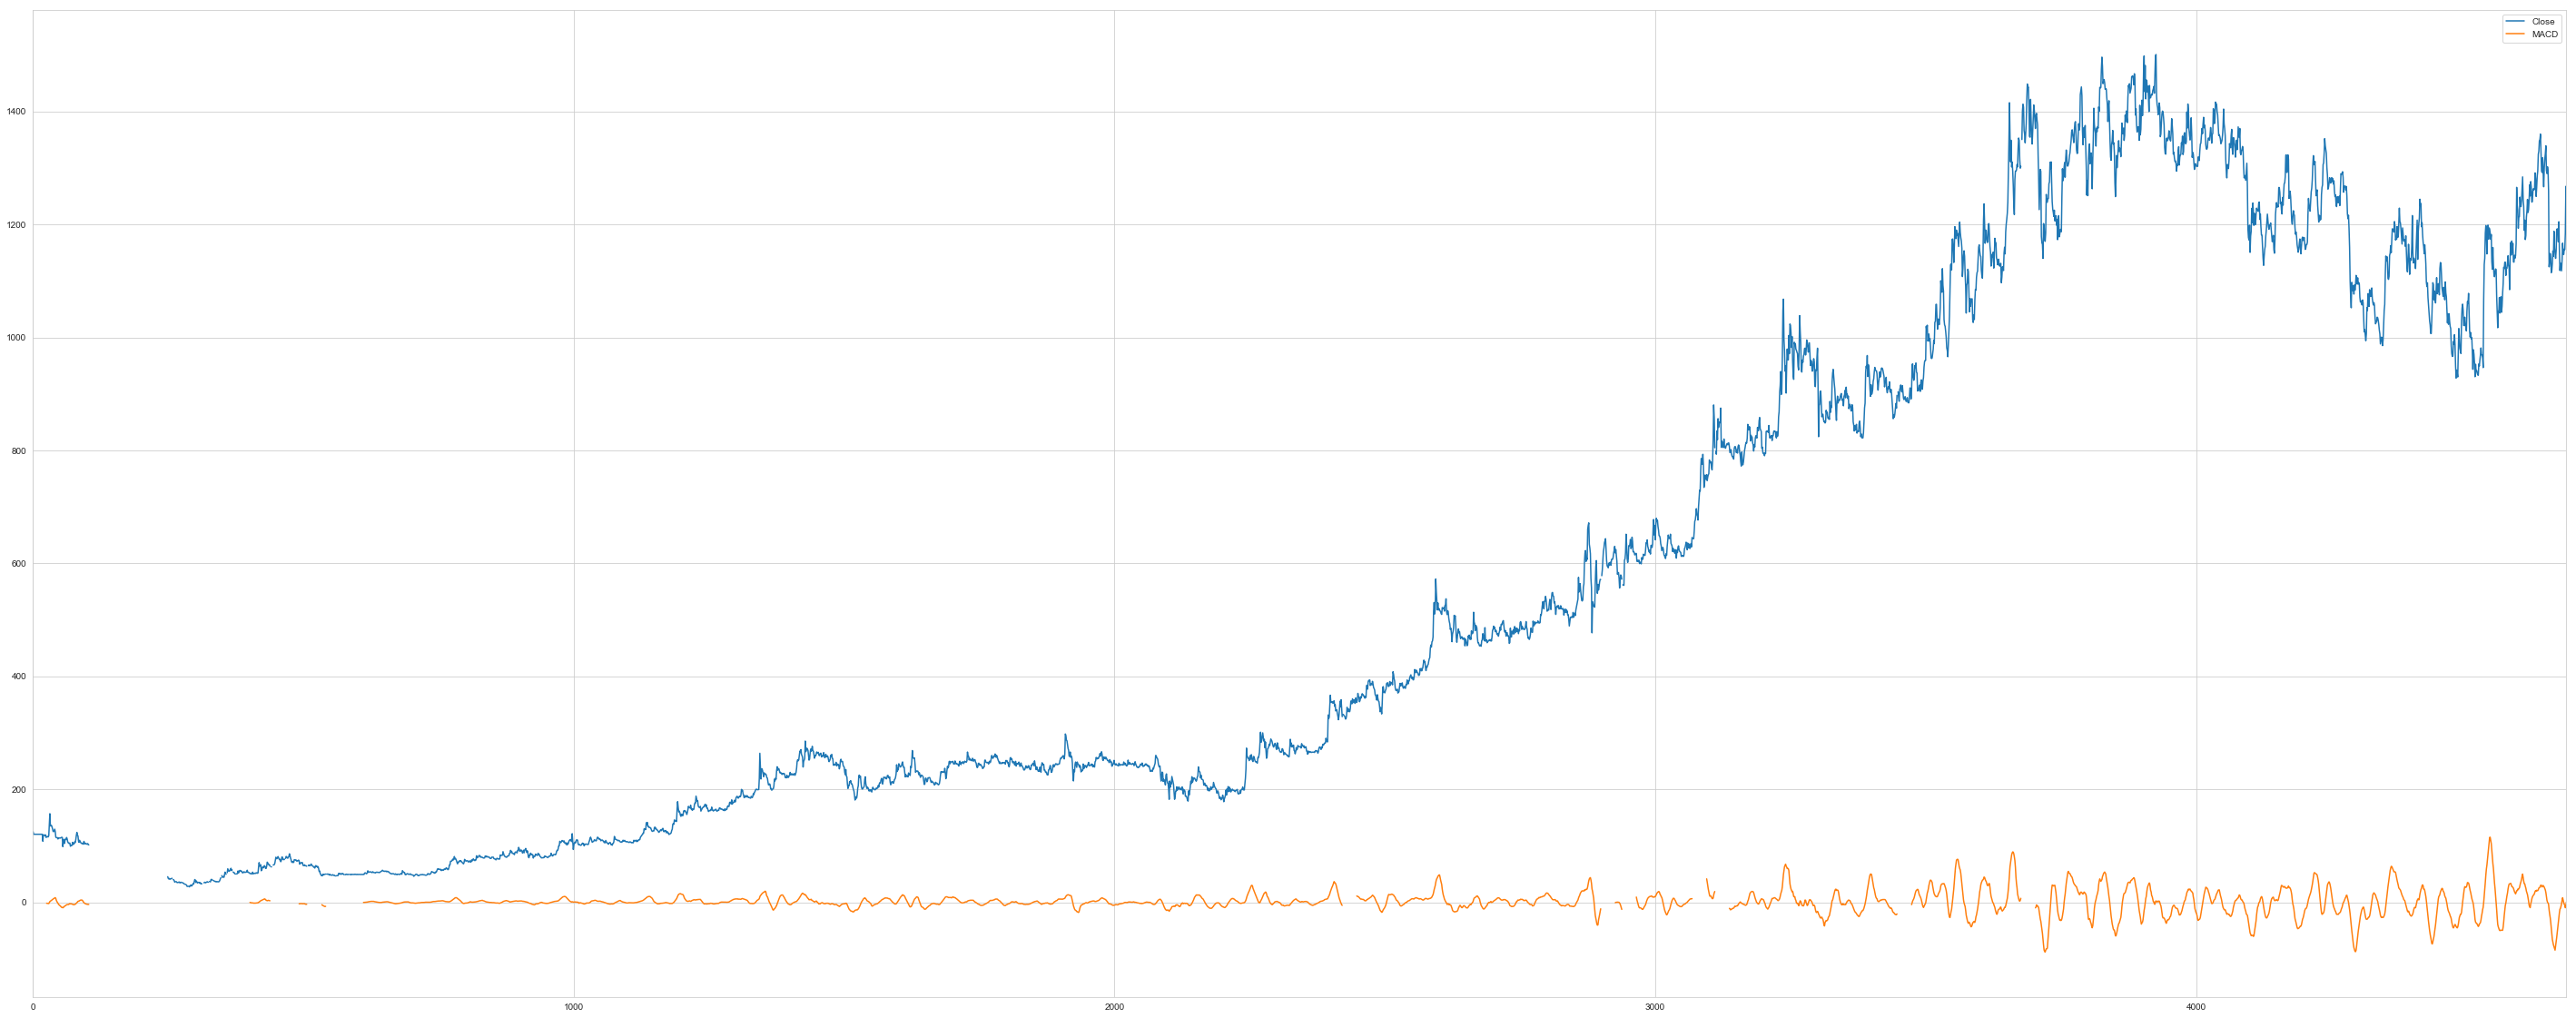

In [12]:
#6 Moving Average Convergence/Divergence (MACD)
MA12 = NFLX['Close'].rolling(12).mean()
MA26 = NFLX['Close'].rolling(26).mean()
MACD = MA12 - MA26
NFLX['MACD'] = MACD
NFLX[['Close','MACD']].plot(subplots=False,figsize=(50,20))

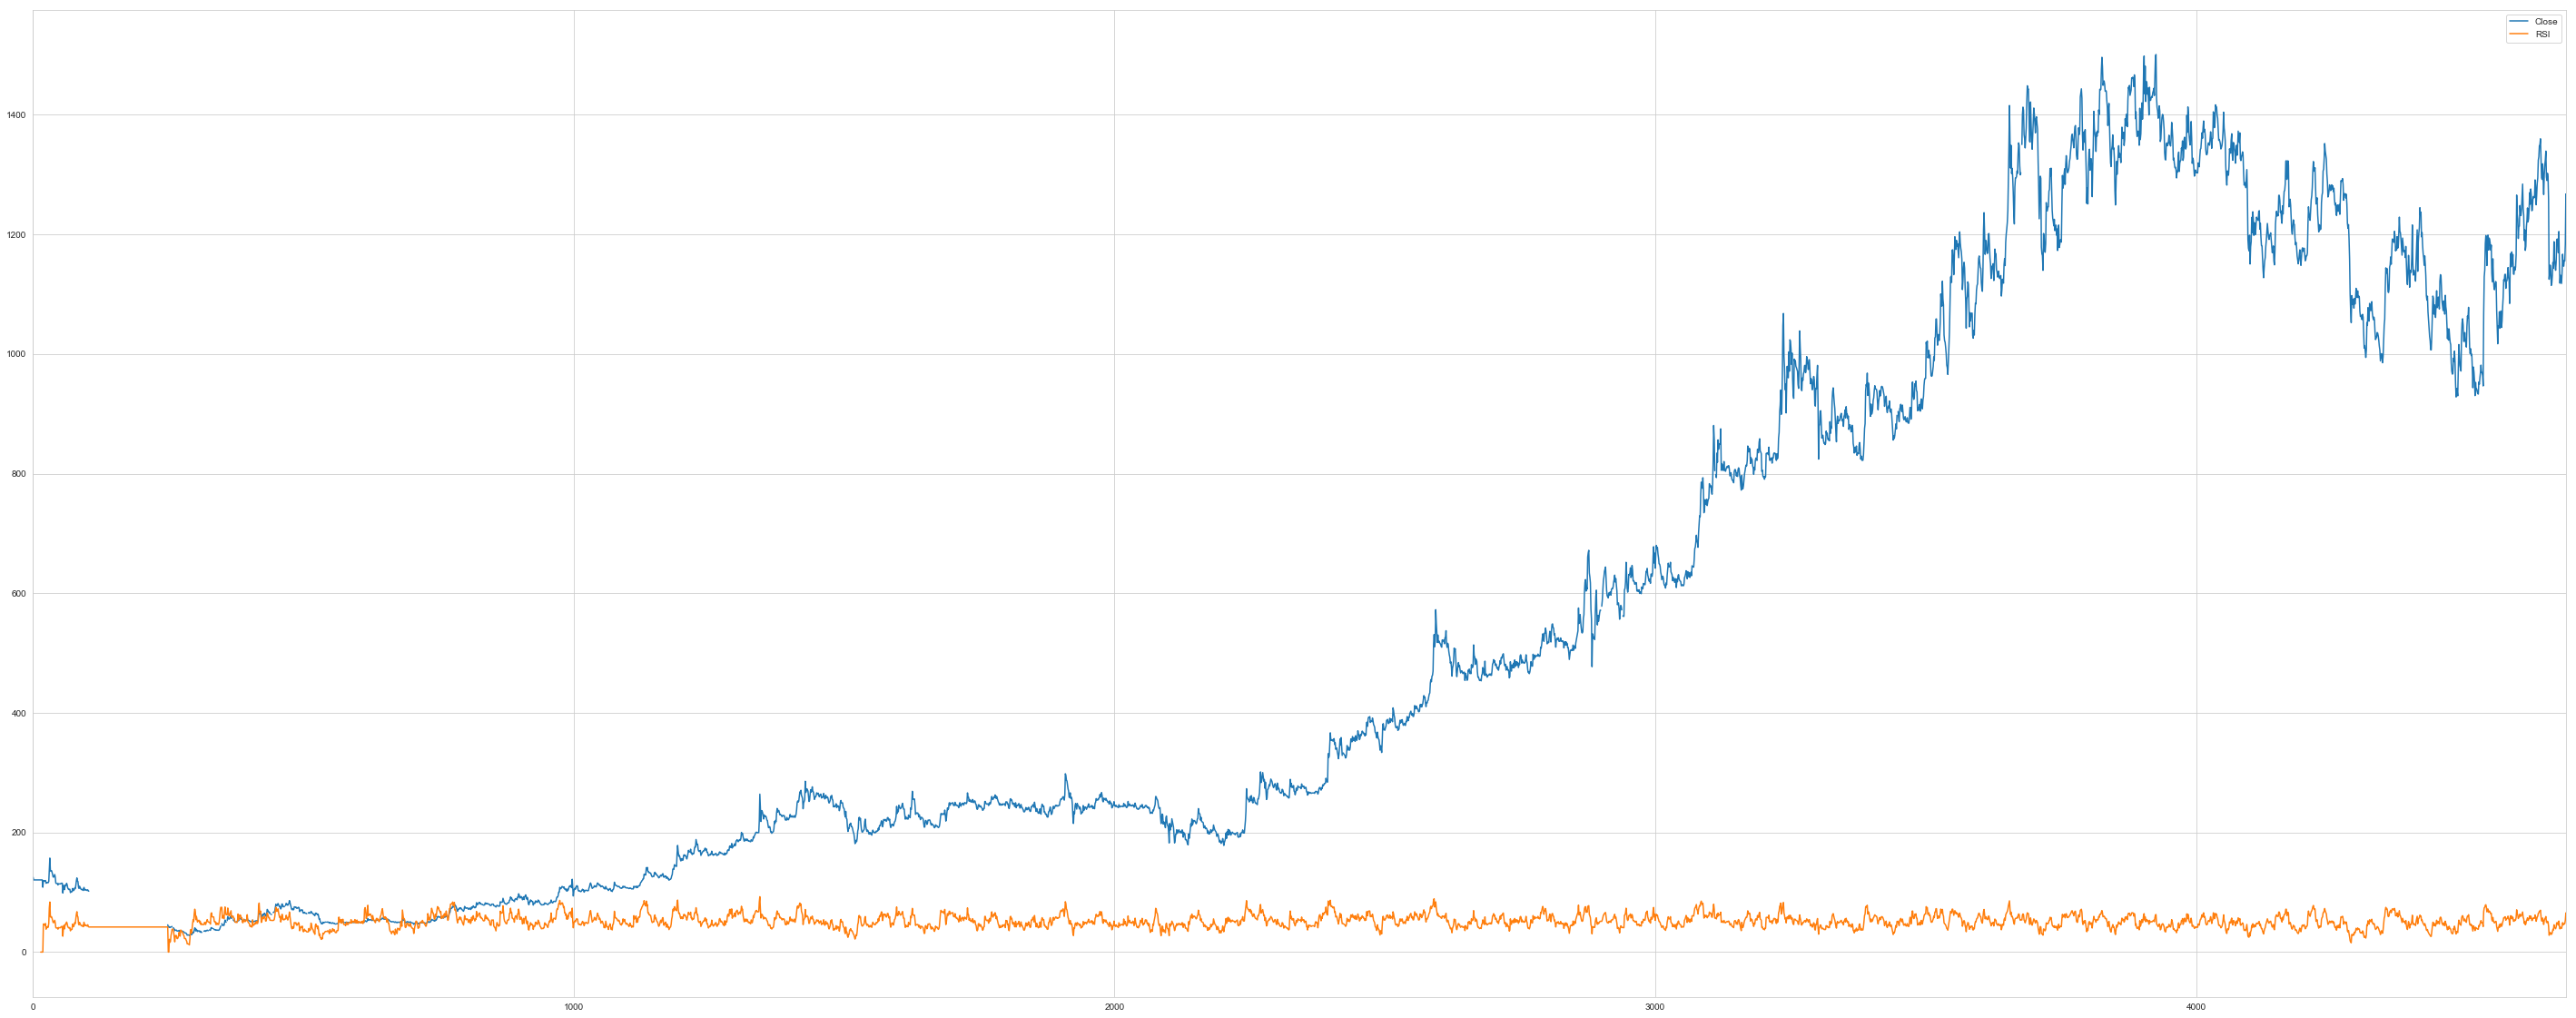

In [13]:
#7 Relative Strength Index (RSI)
rsiVal=14
diffrence = NFLX['Close'].diff()
gain = diffrence.mask(diffrence < 0, 0) 
loss = diffrence.mask(diffrence > 0, 0) 
avgGain = gain.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
avgLoss = loss.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
rs = abs(avgGain/avgLoss)
rsi = 100*(rs/(1+rs))
NFLX['RSI'] = rsi
NFLX[['Close','RSI']].plot(subplots=False,figsize=(50,20))

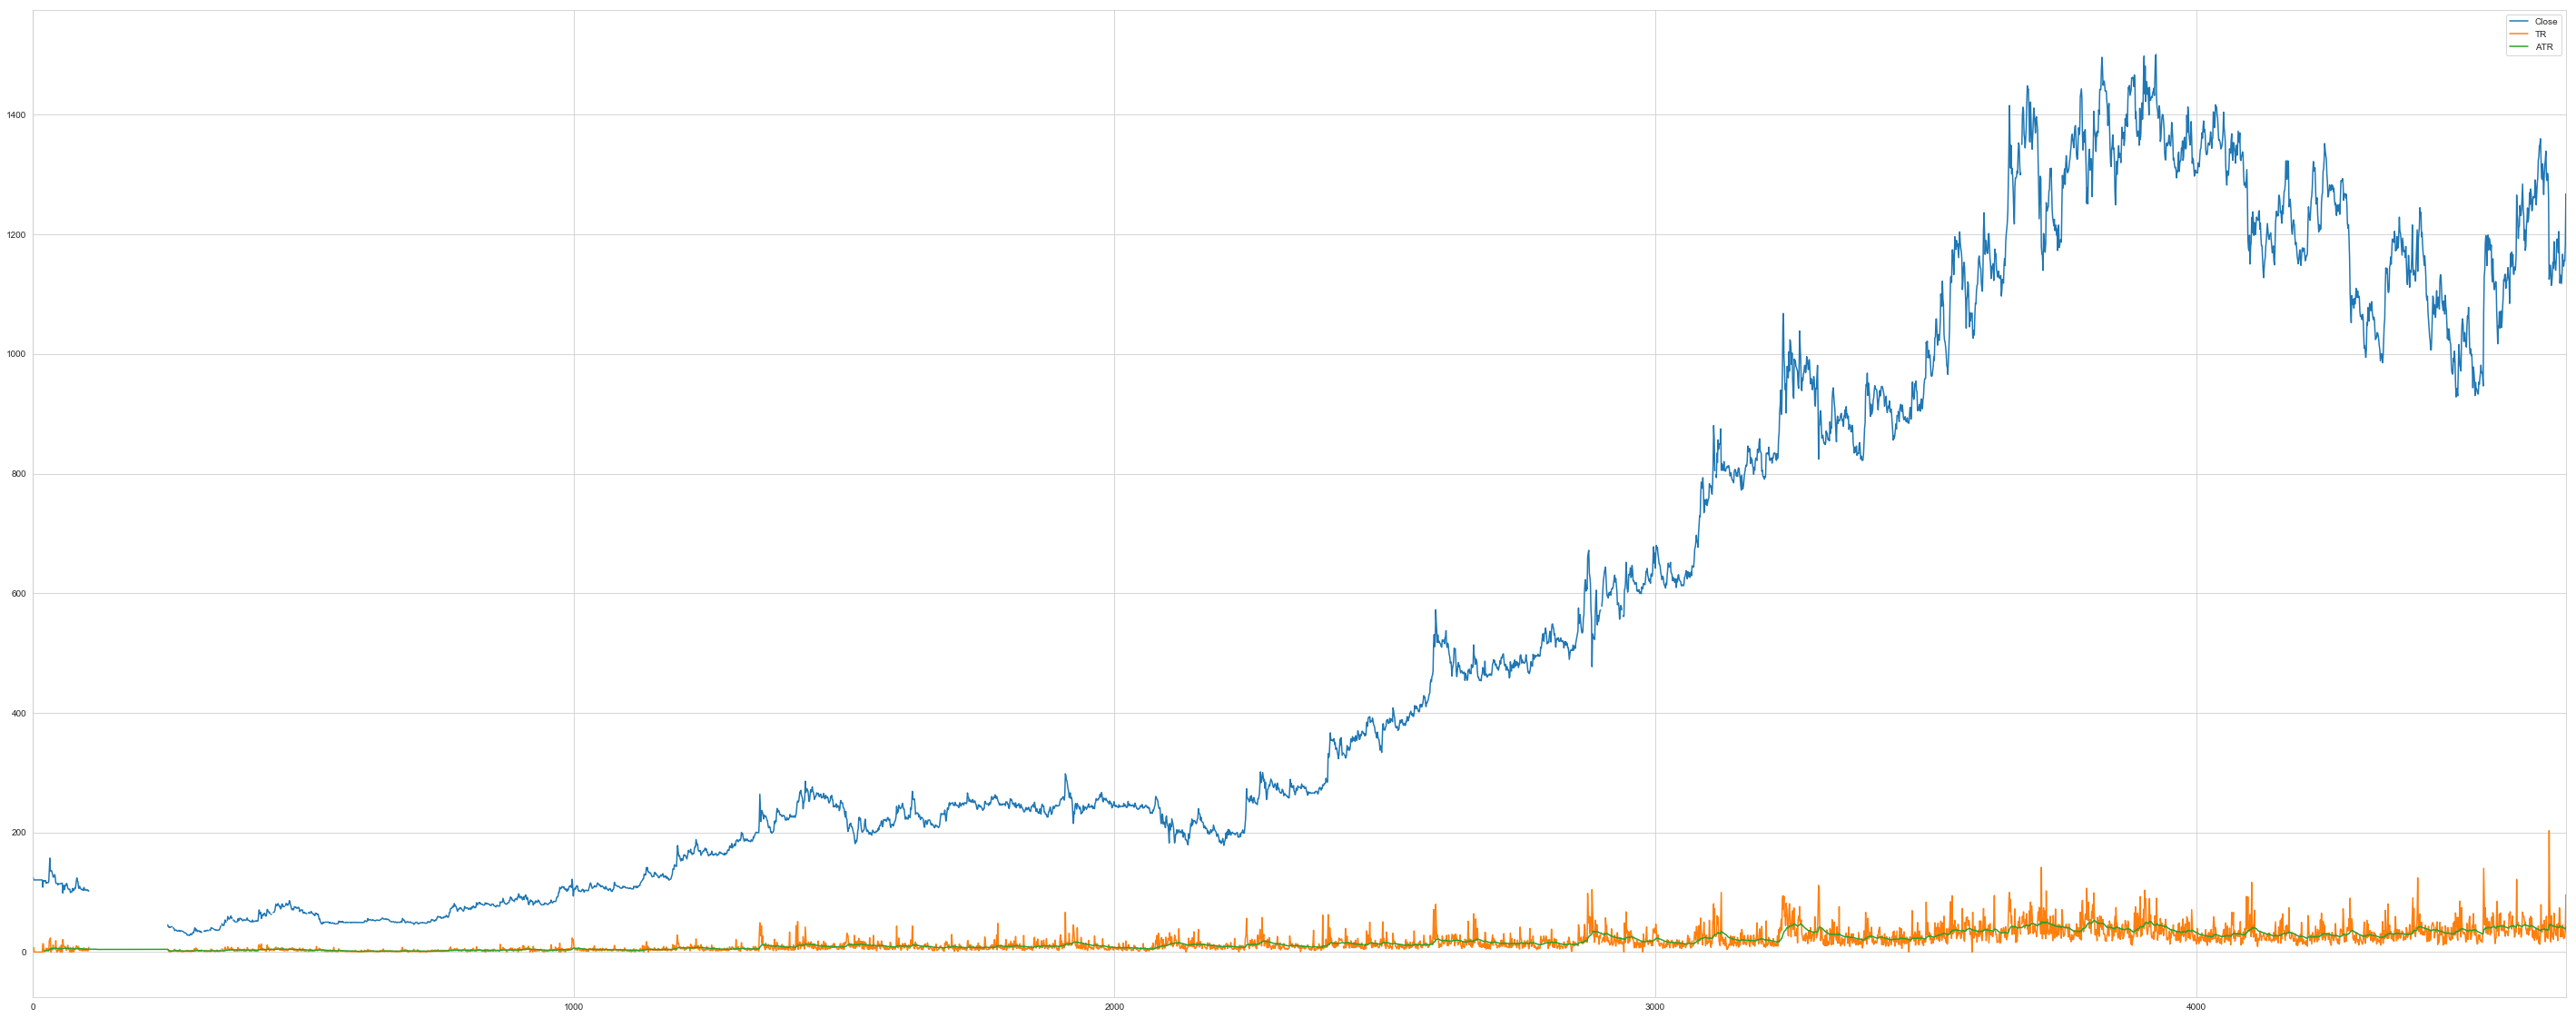

In [14]:
#8 Average True Range (ATR) : measure of Volitality
def TRange(h,l,yc):
    x=h-l
    y=abs(h-yc)
    z=abs(l-yc)
    TR = x
    if y <= x >= z:
        TR = x
    elif x <= y >=z:
        TR = y
    elif x <= z >=y:
        TR = z
    return TR
x=1
TrueRange = []
TrueRange.append(0)
while x < len(NFLX['Close']):
    TR = TRange(NFLX['High'][x],NFLX['Low'][x],NFLX['Close'][x-1])
    TrueRange.append(TR)
    x = x+1
NFLX['TR'] = TrueRange
NFLX['ATR'] = NFLX['TR'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX[['Close','TR','ATR']].plot(subplots=False,figsize=(50,20))

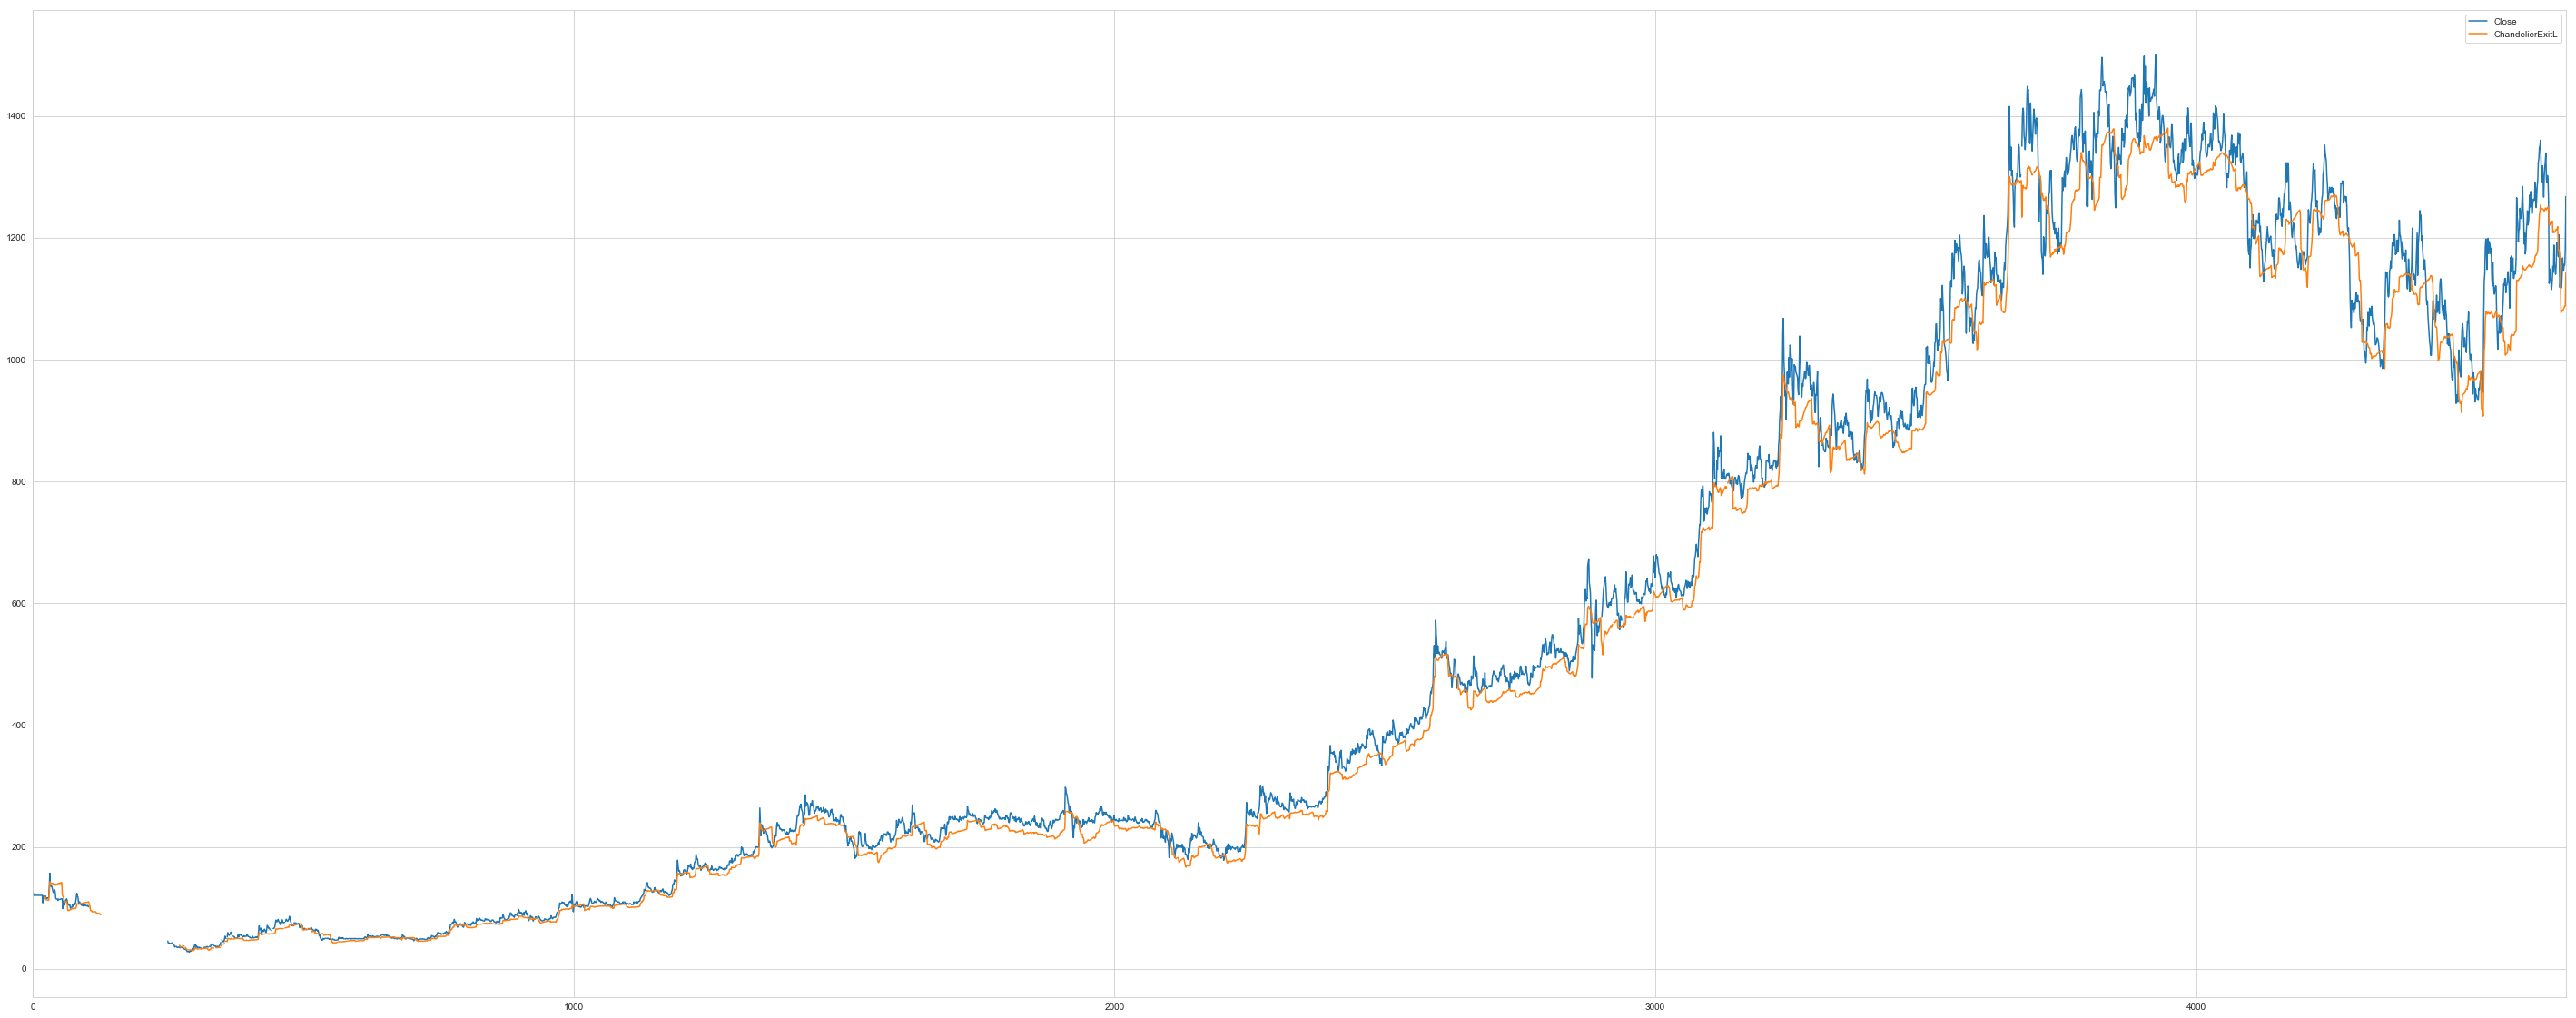

In [15]:
#9  Chandelier Exit 
def Highest(n,emaPeriod):
    max=NFLX['Close'][n]
    for i in range(n,n+emaPeriod+1):
        if NFLX['Close'][i] > max:
            max = NFLX['Close'][i]
    return max
fac =3
ChandelierExitL=np.array([])
ChandelierExitL = np.append(ChandelierExitL, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    ChandelierExit = Highest(i,emaPeriod) - fac*NFLX['ATR'][i+emaPeriod]
    ChandelierExitL = np.append(ChandelierExitL,ChandelierExit)
NFLX['ChandelierExitL']=ChandelierExitL
NFLX[['Close','ChandelierExitL']].plot(subplots=False,figsize=(50,20))

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


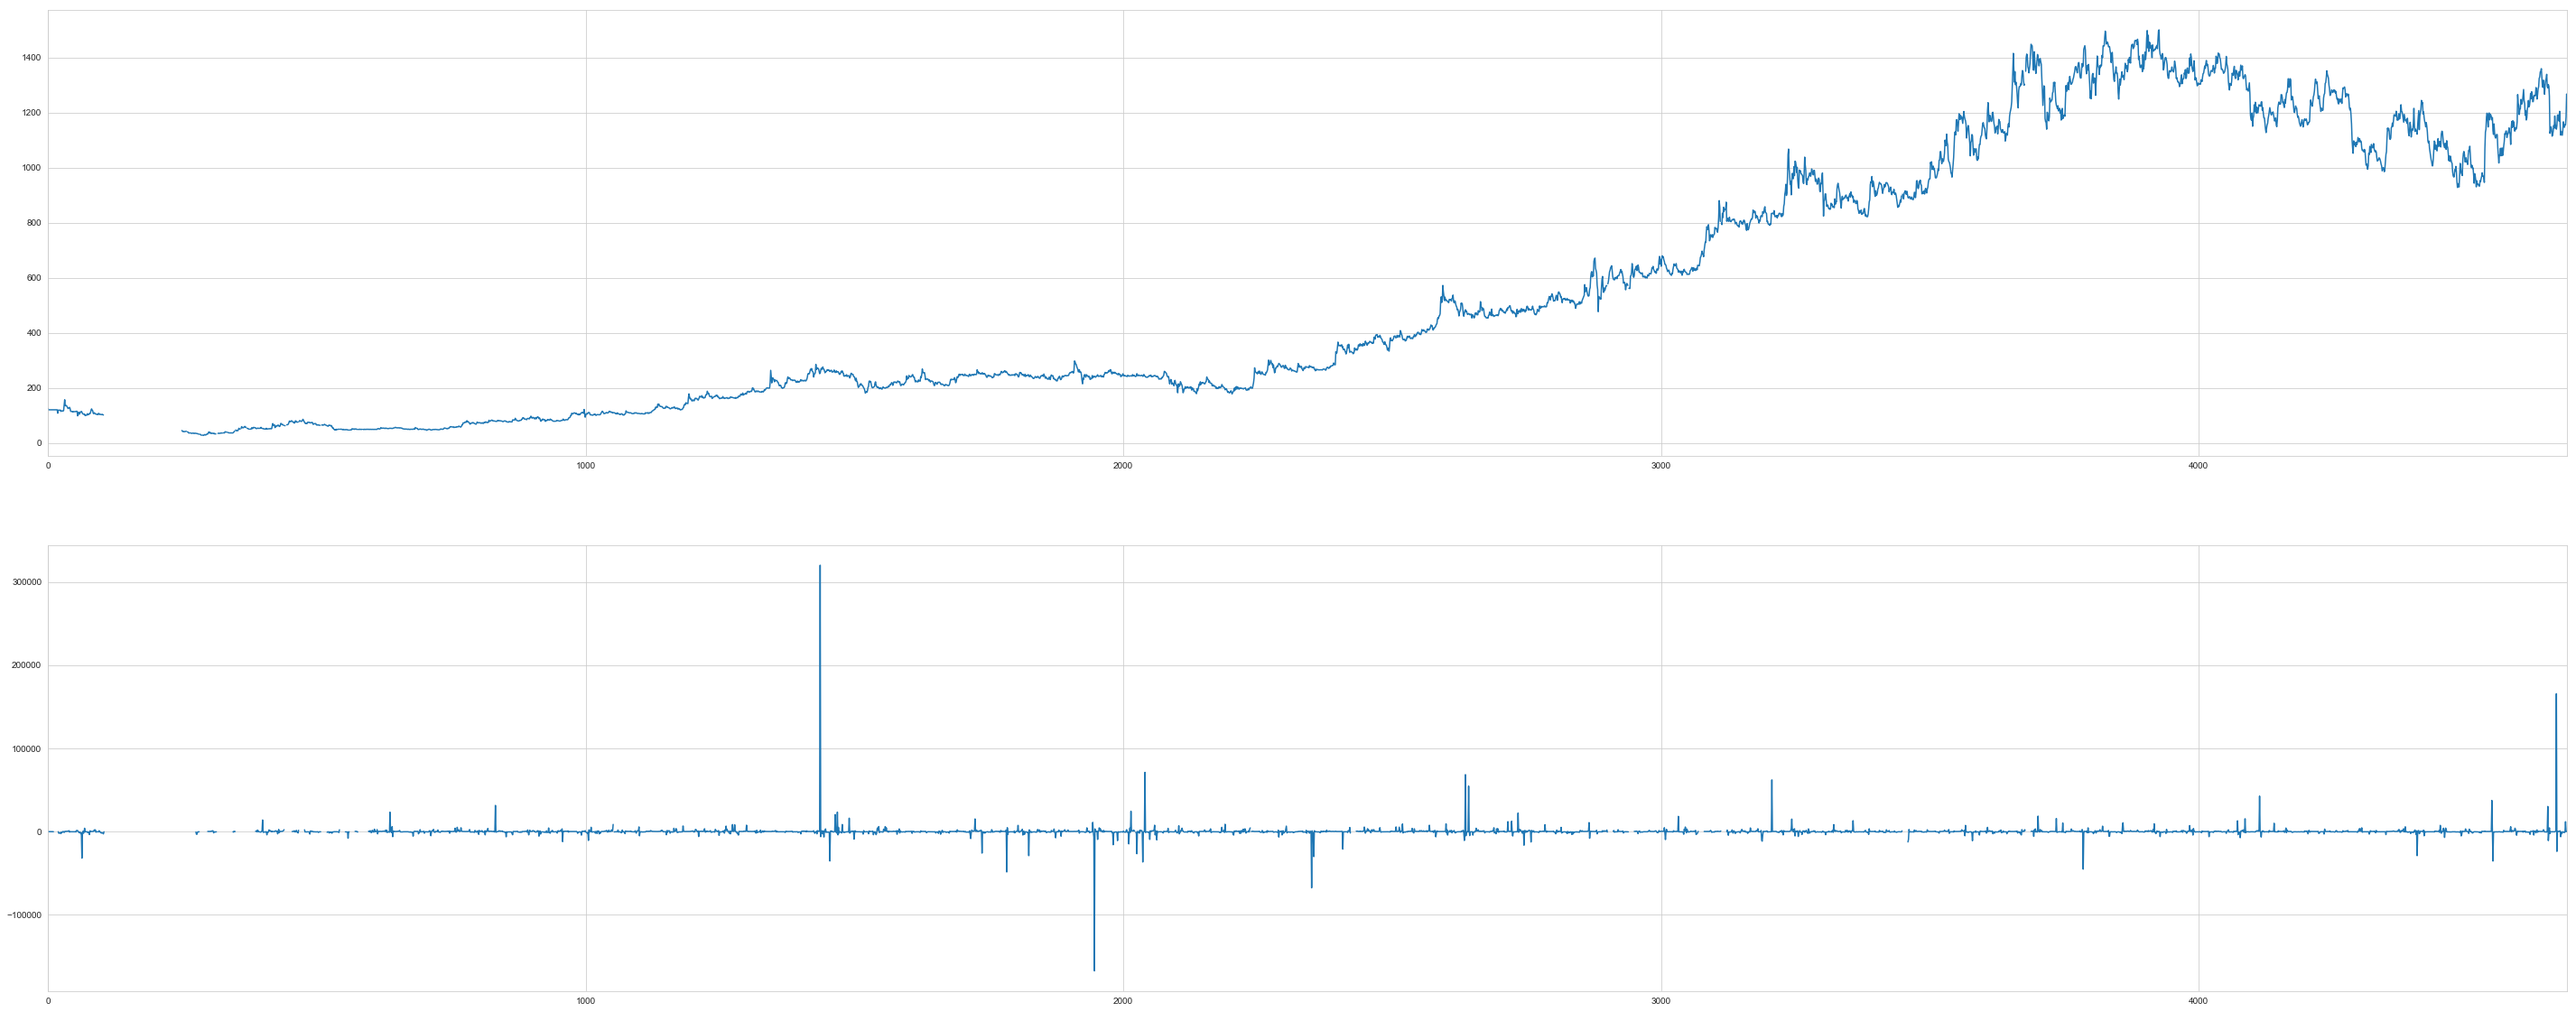

In [16]:
#10 Chande Momentum Oscillator (MOM)
def cmo(timeFrame):
    x=timeFrame
    CMO = []
    for i in range(0,timeFrame):
        CMO.append(0);
    NFLX['Diff'] = NFLX['Close'].diff()
    while x < len(NFLX['Close']):
        upSum=0
        downSum=0
        y=x-timeFrame+1
        while y<x:
            if NFLX['Diff'][y]>=0:
                upSum += NFLX['Diff'][y]
            else:
                downSum += NFLX['Diff'][y]
            y+=1
        curCMO = ((upSum-downSum)/(upSum+float(downSum)))*100
        CMO.append(curCMO)
        x+=1
    NFLX['CMO'] = CMO
    return
cmo(10)
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['CMO'].plot(subplots=False,figsize=(50,20))

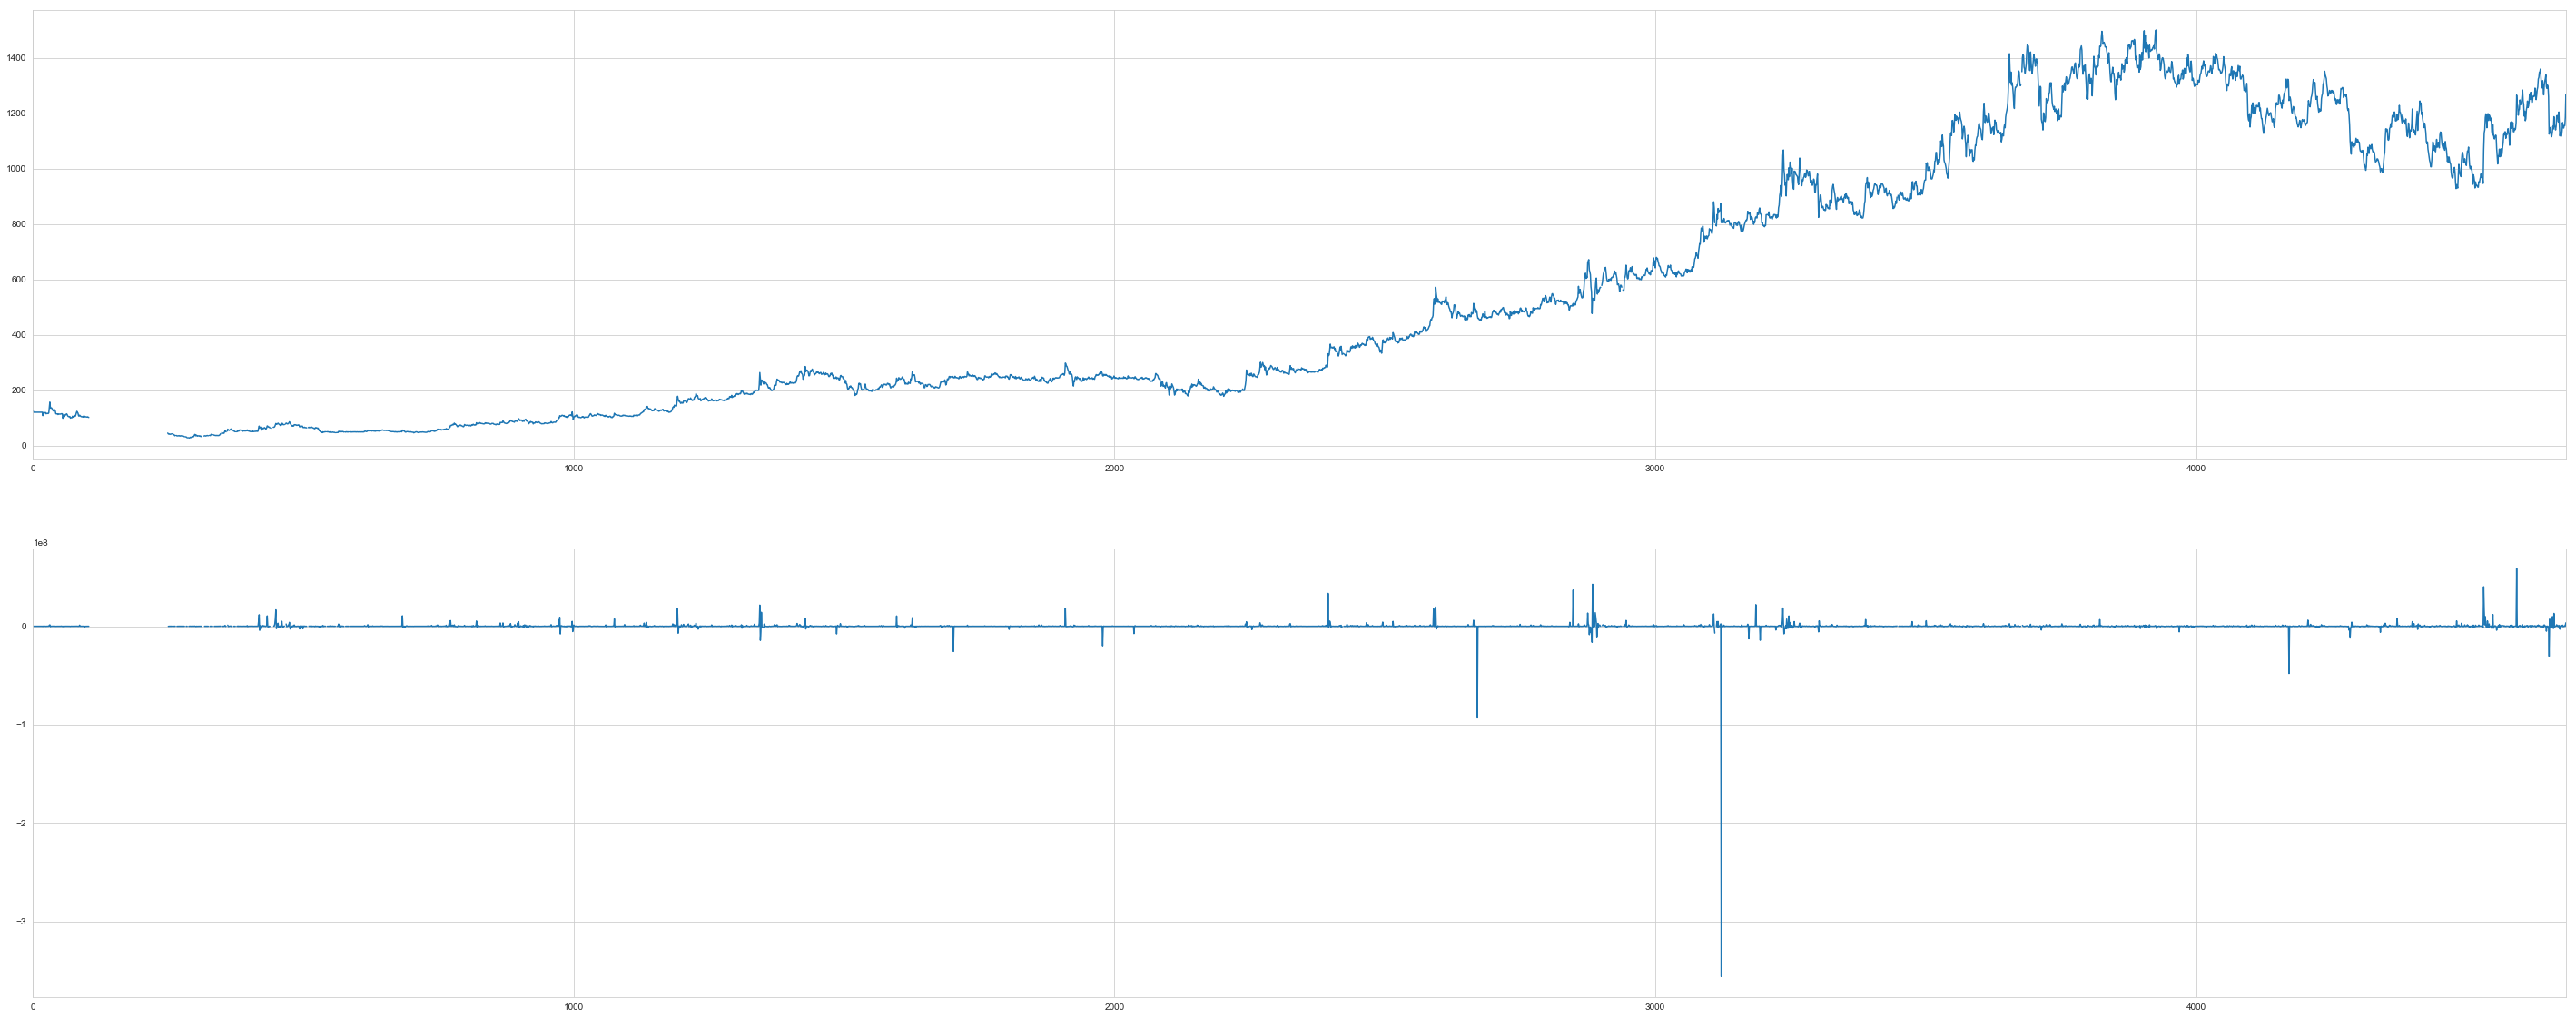

In [17]:
#11 Force Index (FI)
FI = np.array([])
FI = np.append(FI, np.nan)
for i in range(1,len(NFLX['Close'])):
    FIVal = (NFLX['Close'][i] - NFLX['Close'][i-1])*NFLX['Volume'][i]
    FI = np.append(FI,FIVal)
NFLX['FI']=FI
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['FI'].plot(subplots=False,figsize=(50,20))

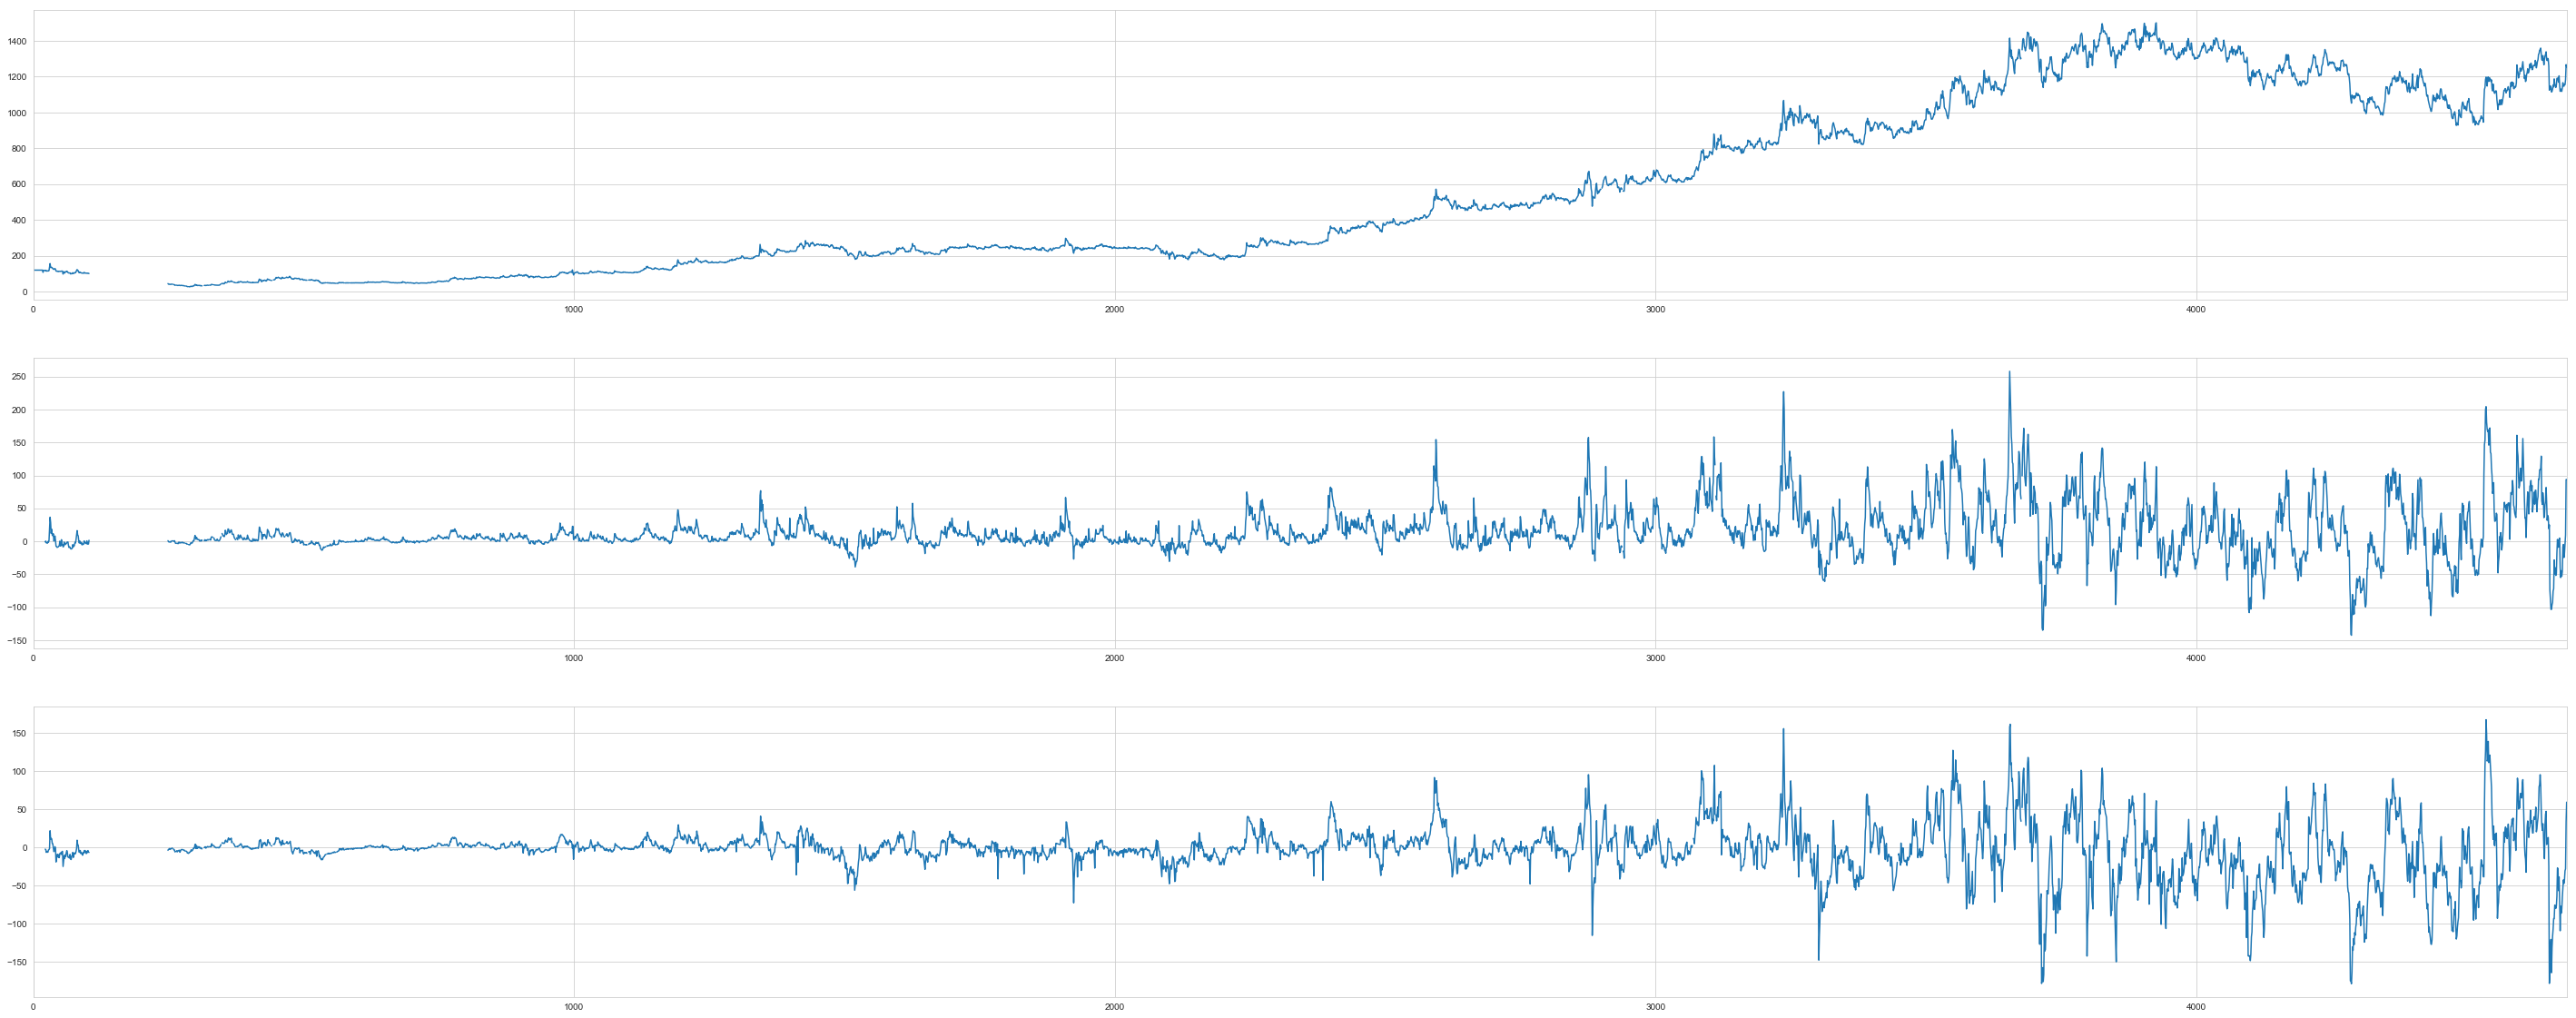

In [18]:
#12 Elder-ray
BullPower = np.array([])
BullPower = np.append(BullPower, [np.nan]*emaPeriod)
BearPower = np.array([])
BearPower = np.append(BearPower, [np.nan]*emaPeriod)
for i in range(emaPeriod,len(NFLX['Close'])):
    BullP = NFLX['High'][i] - NFLX['EMA of 22 Days'][i]
    BullPower = np.append(BullPower,BullP)
    BearP = NFLX['Low'][i] - NFLX['EMA of 22 Days'][i]
    BearPower = np.append(BearPower,BearP)
NFLX['BullPower'] = BullPower
NFLX['BearPower'] = BearPower
plt.figure()
plt.subplot(3,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,2)
NFLX['BullPower'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,3)
NFLX['BearPower'].plot(subplots=False,figsize=(50,20))

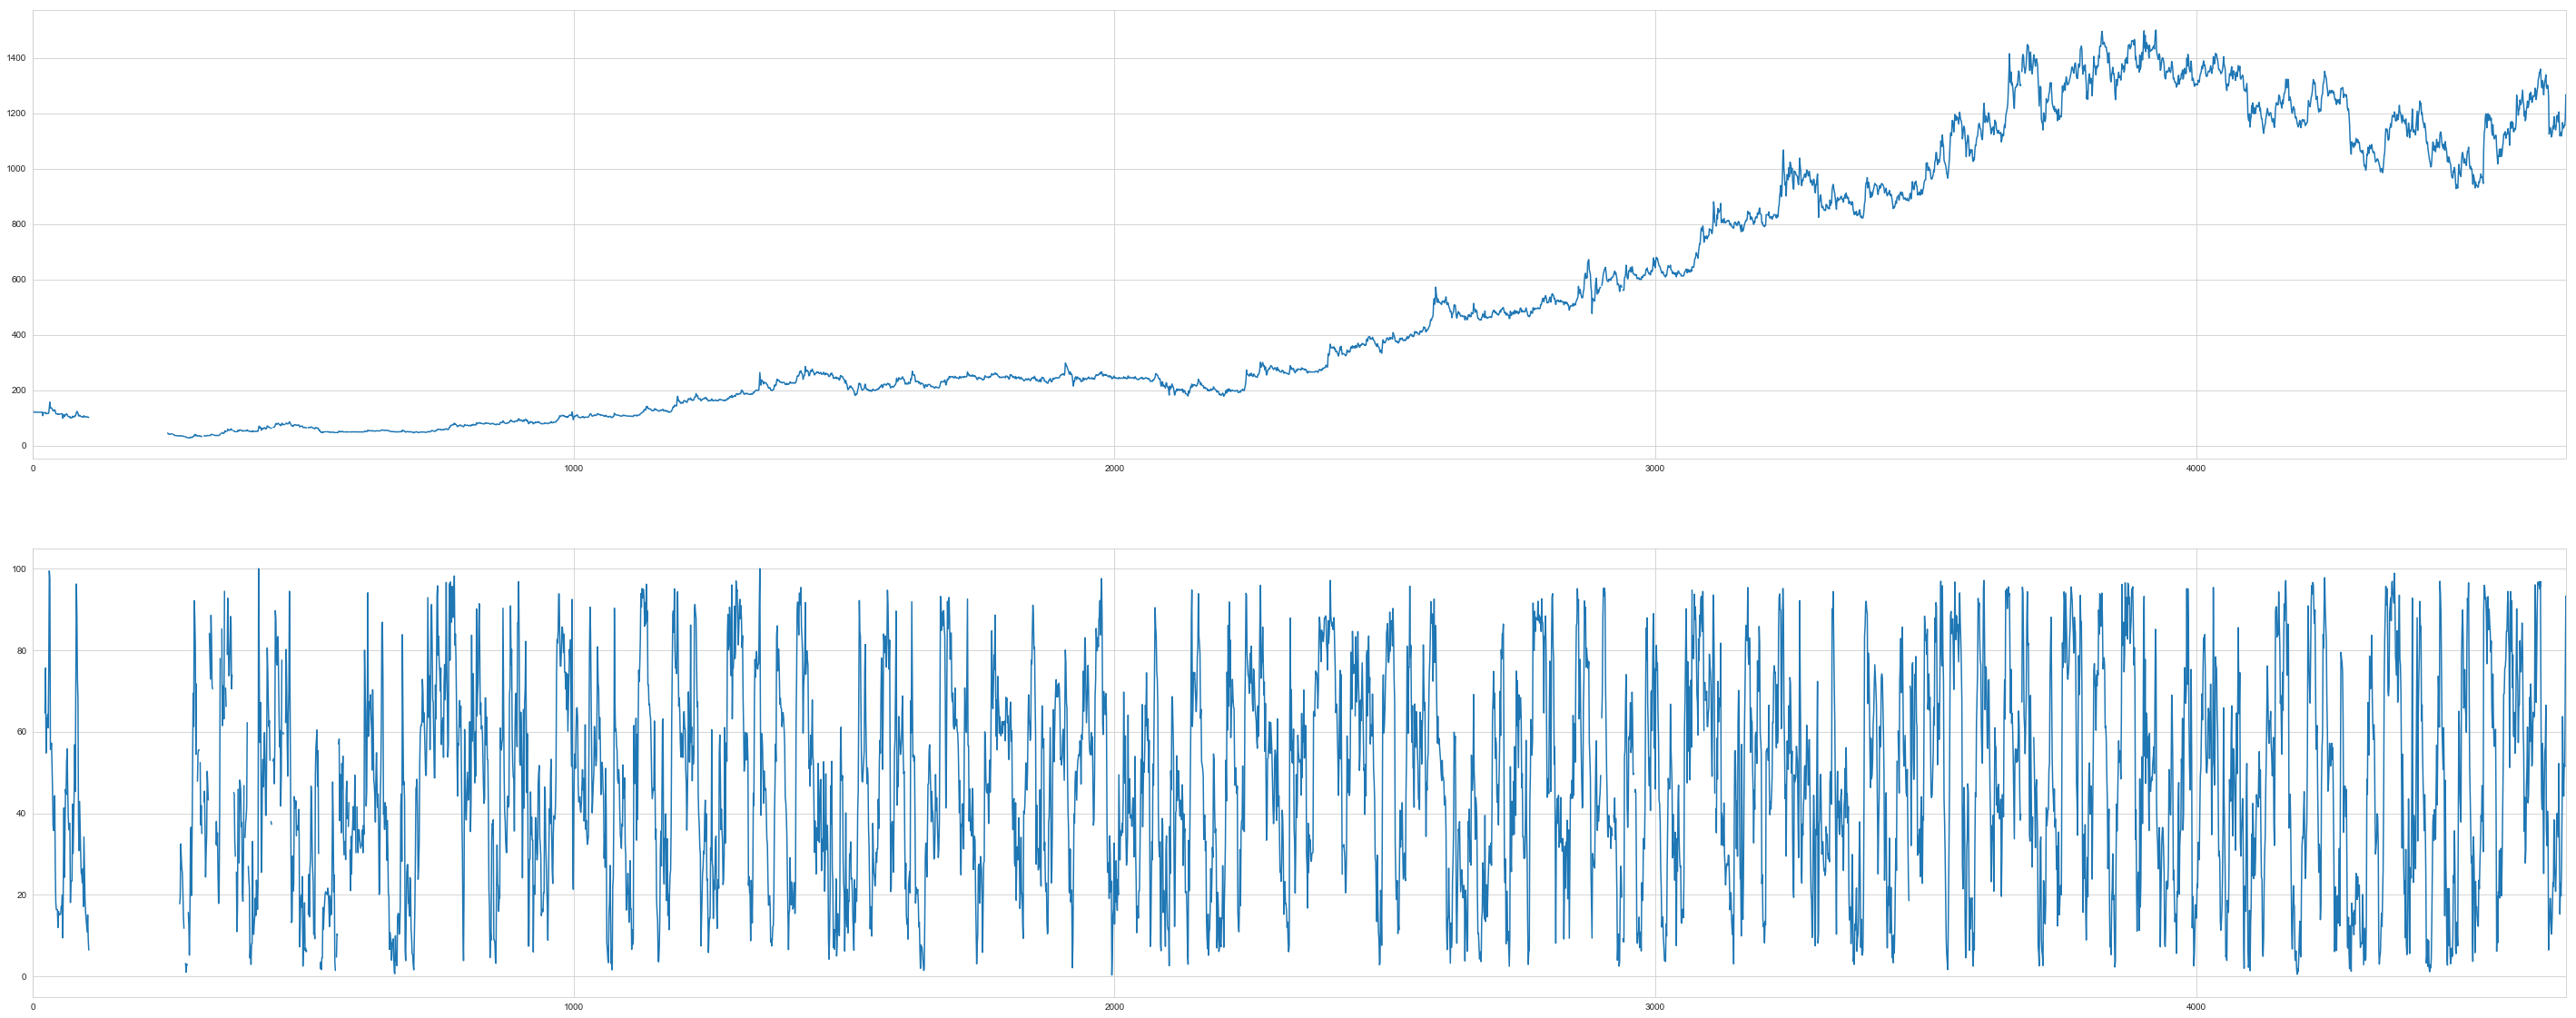

In [19]:
#13 Stochastic %k (STCK)
def HighestLowest(n,period):
    high=NFLX['High'][n]
    low=NFLX['Low'][n]
    for i in range(n,n+period+1):
        if NFLX['High'][i] > high:
            high = NFLX['High'][i]
        if NFLX['Low'][i] < low:
            low = NFLX['Low'][i]
    return high,low
STCK = np.array([])
STCK = np.append(STCK, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    high,low=HighestLowest(i,emaPeriod)
    PK = 100*(NFLX['Close'][i+emaPeriod] - low)/(high - low)
    STCK = np.append(STCK, PK)
NFLX['STCK'] = STCK
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['STCK'].plot(subplots=False,figsize=(50,20))

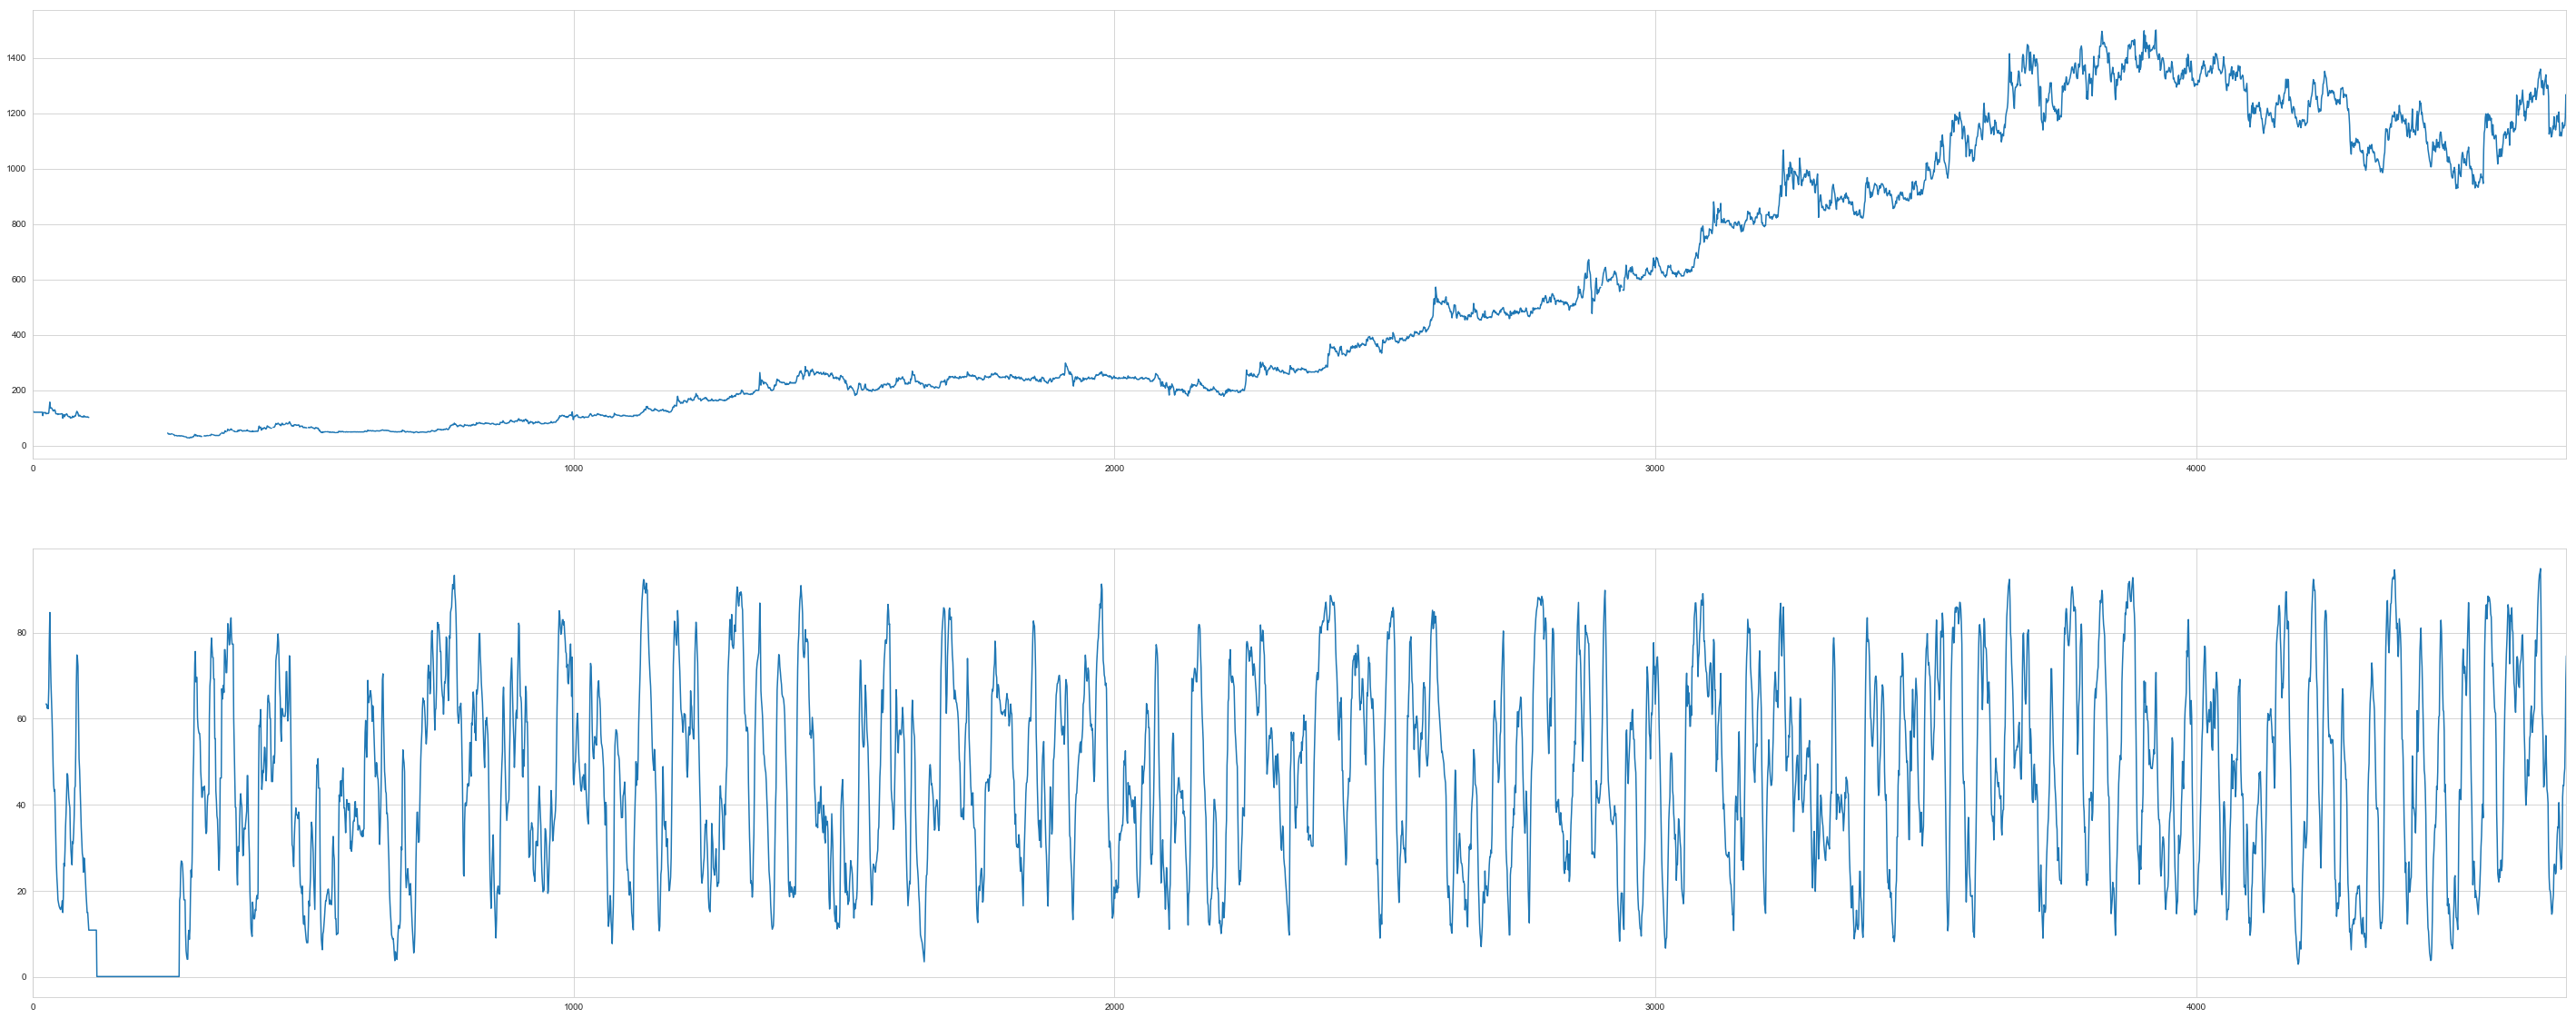

In [20]:
#14 Stochastic %D (STCD)
NFLX['STCD'] = NFLX['STCK'].ewm(com = 2 , min_periods = 3).mean()
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['STCD'].plot(subplots=False,figsize=(50,20))

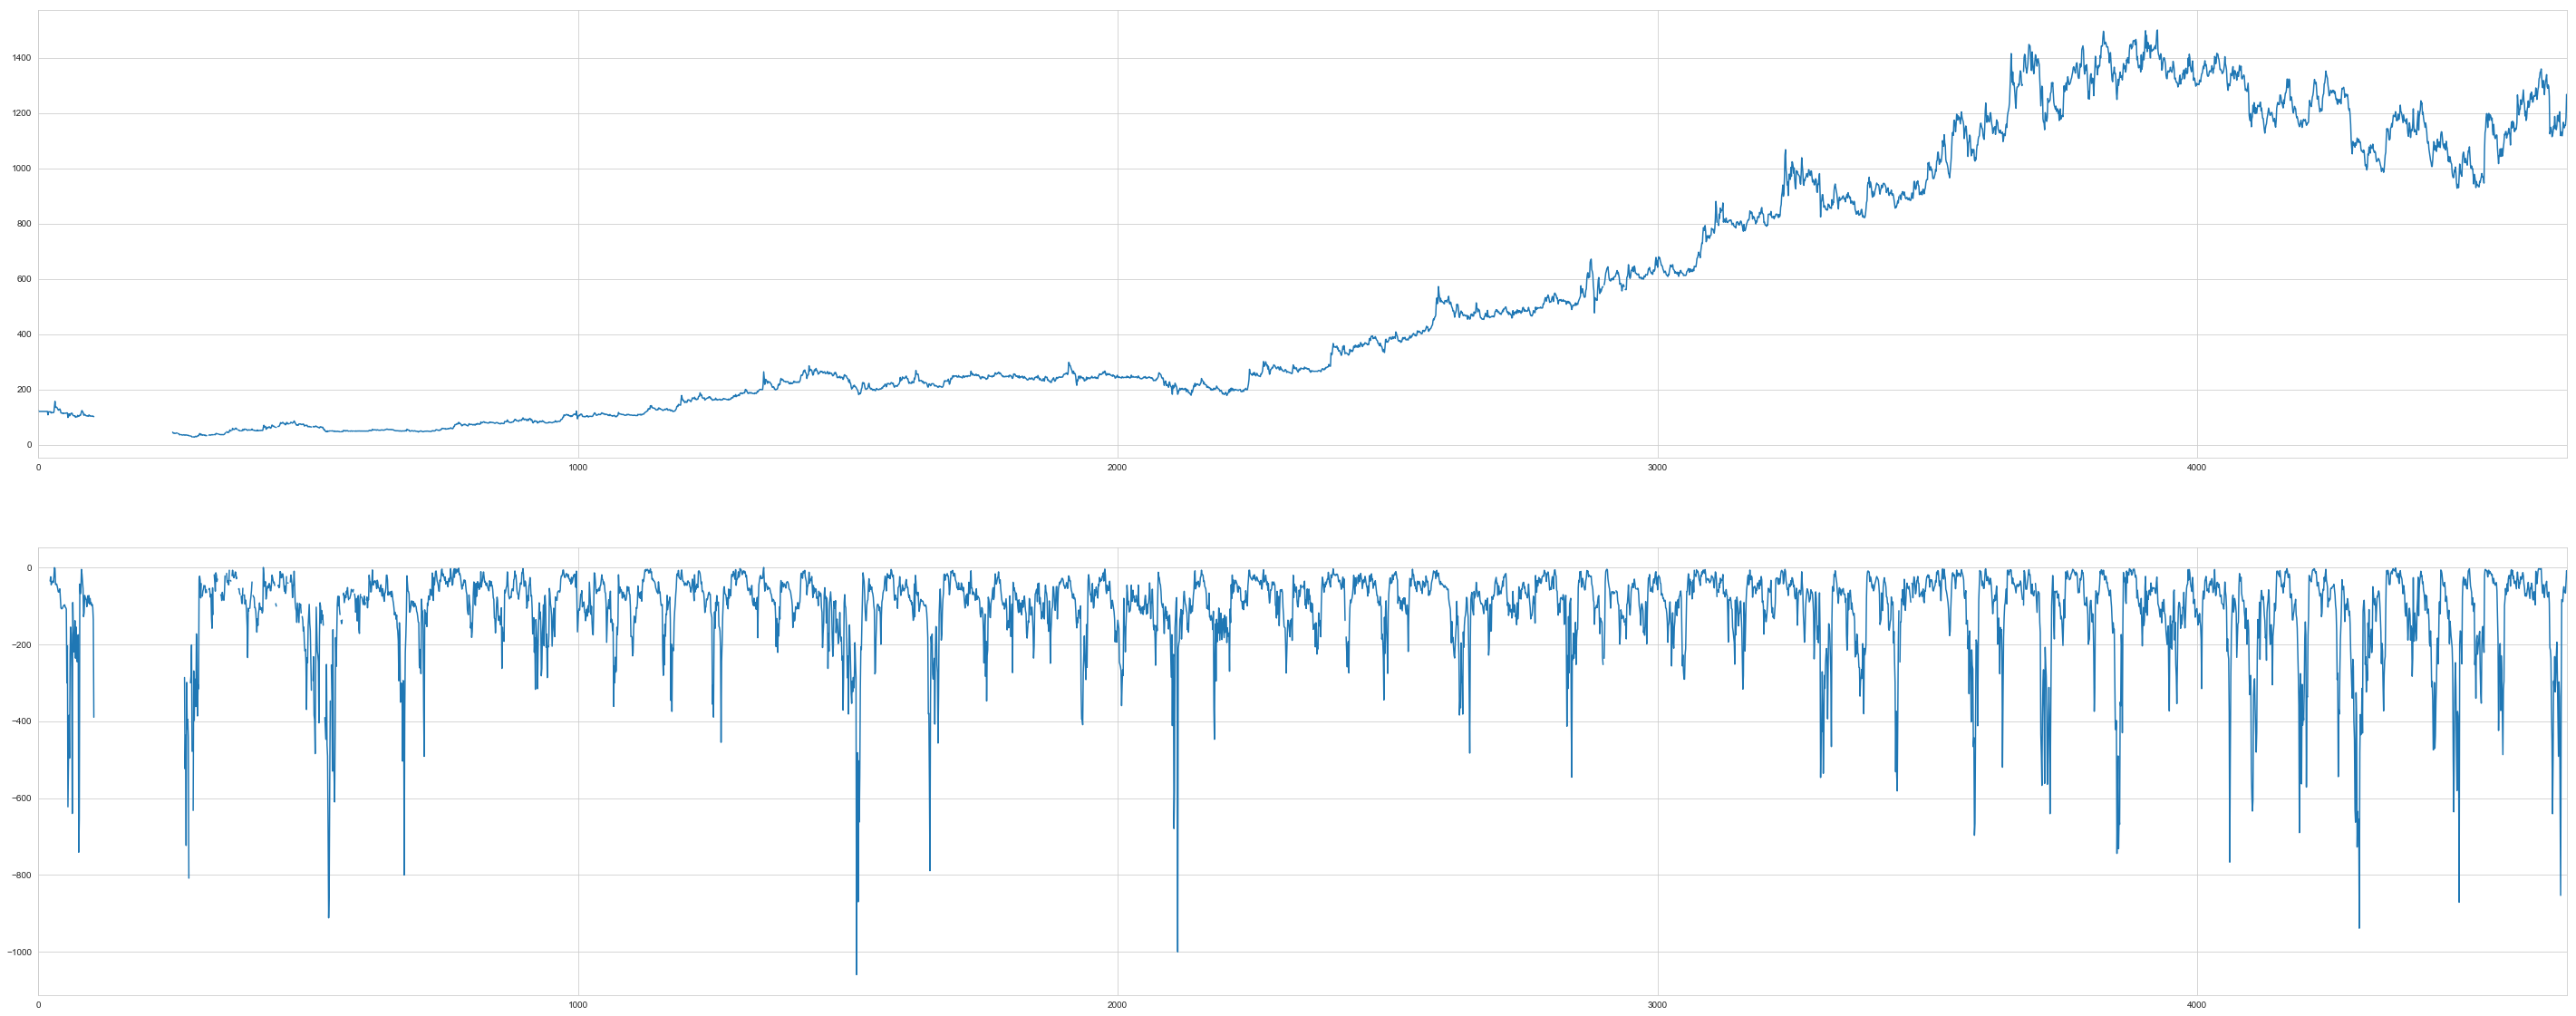

In [21]:
#15 Williams %R
def Highest(n,period):
    high=NFLX['High'][n]
    for i in range(n,n+period+1):
        if NFLX['High'][i] > high:
            high = NFLX['High'][i]
    return high
def Lowest(n,period):
    low=NFLX['Low'][n]
    for i in range(n,period+1):
        if NFLX['Low'][i] < low:
            low = NFLX['Low'][i]
    return low
WilliamsR = np.array([])
WilliamsR = np.append(WilliamsR, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    high=Highest(i,emaPeriod)
    low=Lowest(i,emaPeriod)
    W = ((-100)*(high - NFLX['Close'][i+emaPeriod]))/((high - float(low)))
    WilliamsR = np.append(WilliamsR, W)
NFLX['WilliamsR'] = WilliamsR
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['WilliamsR'].plot(subplots=False,figsize=(50,20))

2771.0810810810813
-949.052540648001
-2684.6666666666665
-4145.6979719546625
144.03846153846155
-4084.222928842134
8059.052046347086
-4137.932723776242
10539.60031383792
-1334.393756740606
25293.723618090455
-806.410497960466
2412.017491554952
-207.21243199989794
3211.1845889446945
-5668.551236266642
-9793.204171223268
-10295.98457830835
-19329.32797810299
22629.442895409687
6629.688592364797
-6130.385527499974
-4382.105268995092
-13095.43548444728
-307.1072661574038
772.2052014787192
1619.2692047999865
-1565.2850233382765
-2892.550024406553
-1295.008757984154
1146.3545998784423
-1294.5955286967512
4763.518092059541
4013.2198014030646
8594.160524773726
-8146.894674294741
514.9470648887761
-2758.0648818822915
-9612.02218153849
-1803.330327782886
1601.3423440547526
-12986.750429928194
-782.6372738392946
-988.09831521537
1505.1831891199888
-5725.405746540123
-14827.259710426193
-6443.440322206956
-2133.446937266683
-18049.638173969965
-7941.944910315747
-6574.439049597337
-2163.7415327999

7530.618565048924
-10191.111111111111
3517.7837837837837
3480.6883834988
-872.0534123085545
-3450.822469260573
4631.306332156408
-1880.69593983999
-7709.969075692326
-5100.813148342903
-10749.029126641643
-2797.668503123331
3321.720920378626
-2886.6058128695836
-2157.1877184179534
2039.7567567567567
-1415.4516782609012
2899.4690805486166
-1579.93579920002
-2645.8053392746087
19122.288792123018
-2157.6488934634367
-5058.1839148421595
1042.688169661666
-2720.853072842093
-6000.718379499922
846.1998675715682
9031.96188771327
368.73323377780576
1962.070562076176
3488.5803242184916
3713.51340210528
5341.533333333333
1860.6991801583526
-3191.1283857853937
-3061.3920000000003
-715.0
3139.622047244094
717.7042181505199
-1115.0146431246712
-1223.2986707999562
-2492.737845733888
-2415.42786512937
725.9204348125708
-4143.257399623296
-5758.5330036363475
506.7277895598885
3843.0767902006814
16726.183754056397
-855.170418957581
86.74064809526217
-449.0391727407247
-1042.5053820000296
715.1537177647

329.2268210198554
18169.375455651192
-15869.186919975591
-3401.376508437464
2632.682264726145
-16049.45561049064
-19186.628209914463
-23183.688240848645
-6417.004835800063
-26553.776306027245
15985.066666666668
-7818.742924181238
12759.900324588014
11466.79354465338
-1413.1543733878073
7866.061600799945
-17555.247730329156
9956.544433474324
7386.164261048738
11406.384484250031
-17626.35183378272
12921.253059130699
2967.776720962295
-28892.209987714632
2937.1411843511164
24595.87274300297
4911.073743586213
-18239.189781021898
-1633.1243387589486
14743.993503514097
-20115.820863639143
-15826.74679154723
7047.121199007319
17944.759173409726
8822.820861793129
31005.074022456552
7147.581933795546
12067.453279492398
-2074.7915251132663
10535.166061241345
-21803.38830132489
-14948.149262709758
-31084.842018154162
1334.7933560370434
-13021.423470722359
-32432.786602528897
34580.45092359695
4880.982646309318
2025.9888323477303
212.26907842680092
-48042.65945472695
-6721.295027913503
-331.681536

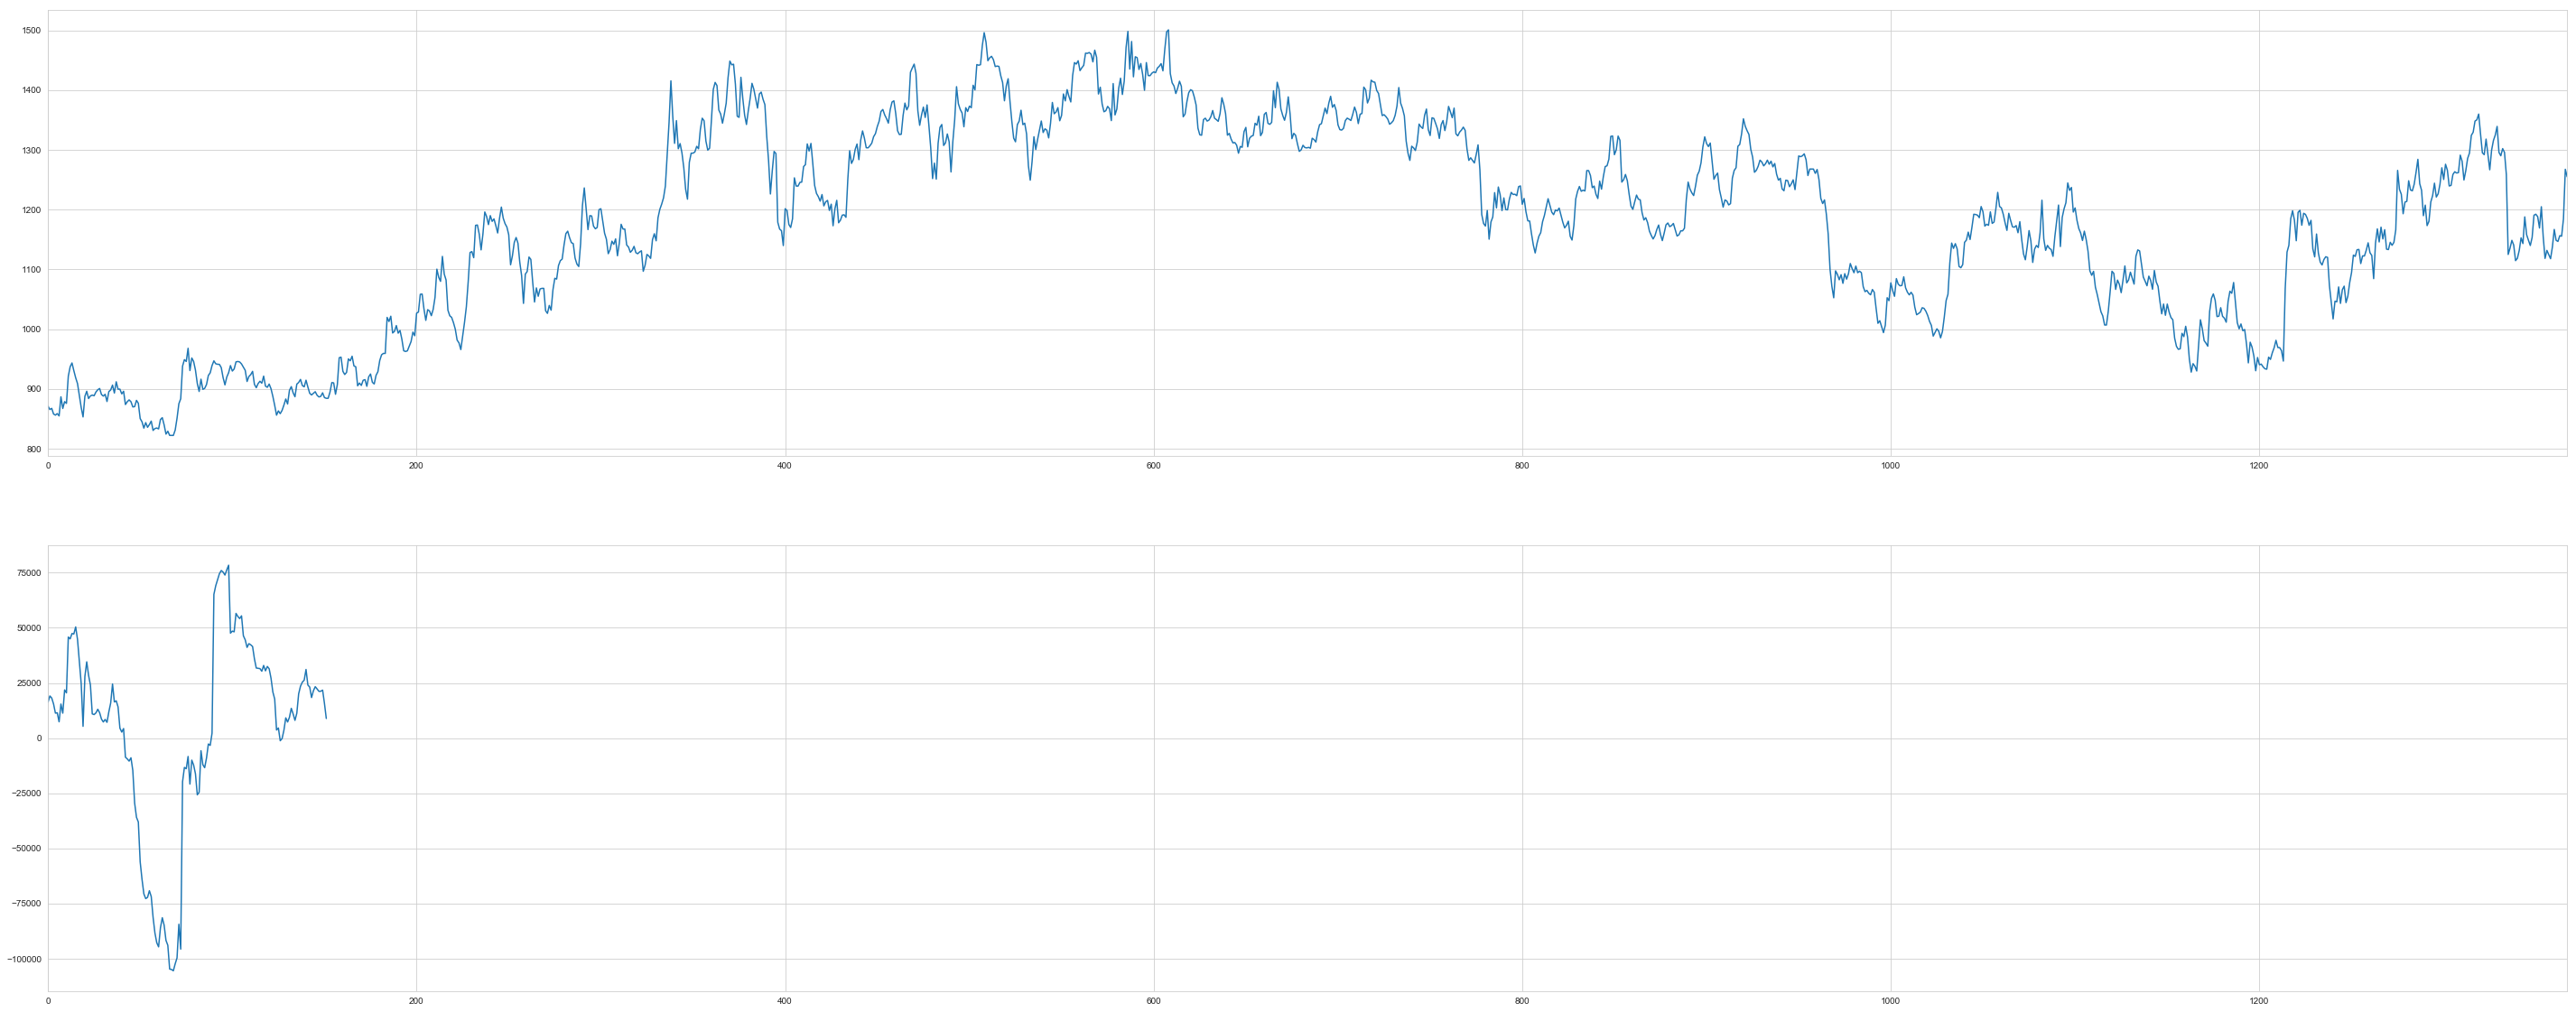

In [53]:
#16  Accumulation Distribution Oscillation (ADO)
NFLX['Multiplier']= (2*NFLX['Close']-NFLX['High']-NFLX['Low'])/(NFLX['High']-NFLX['Low'])
NFLX['MVolume']=NFLX['Multiplier']*NFLX['Volume']
ADL = np.array([])
ADL = np.append(ADL,NFLX['MVolume'][0])
for i in range(1,len(NFLX['Close'])):
    Adl = ADL[i-1] + NFLX['MVolume'][i]
    ADL = np.append(ADL,Adl)
NFLX['ADL'] = ADL
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['ADL'].plot(subplots=False,figsize=(50,20))

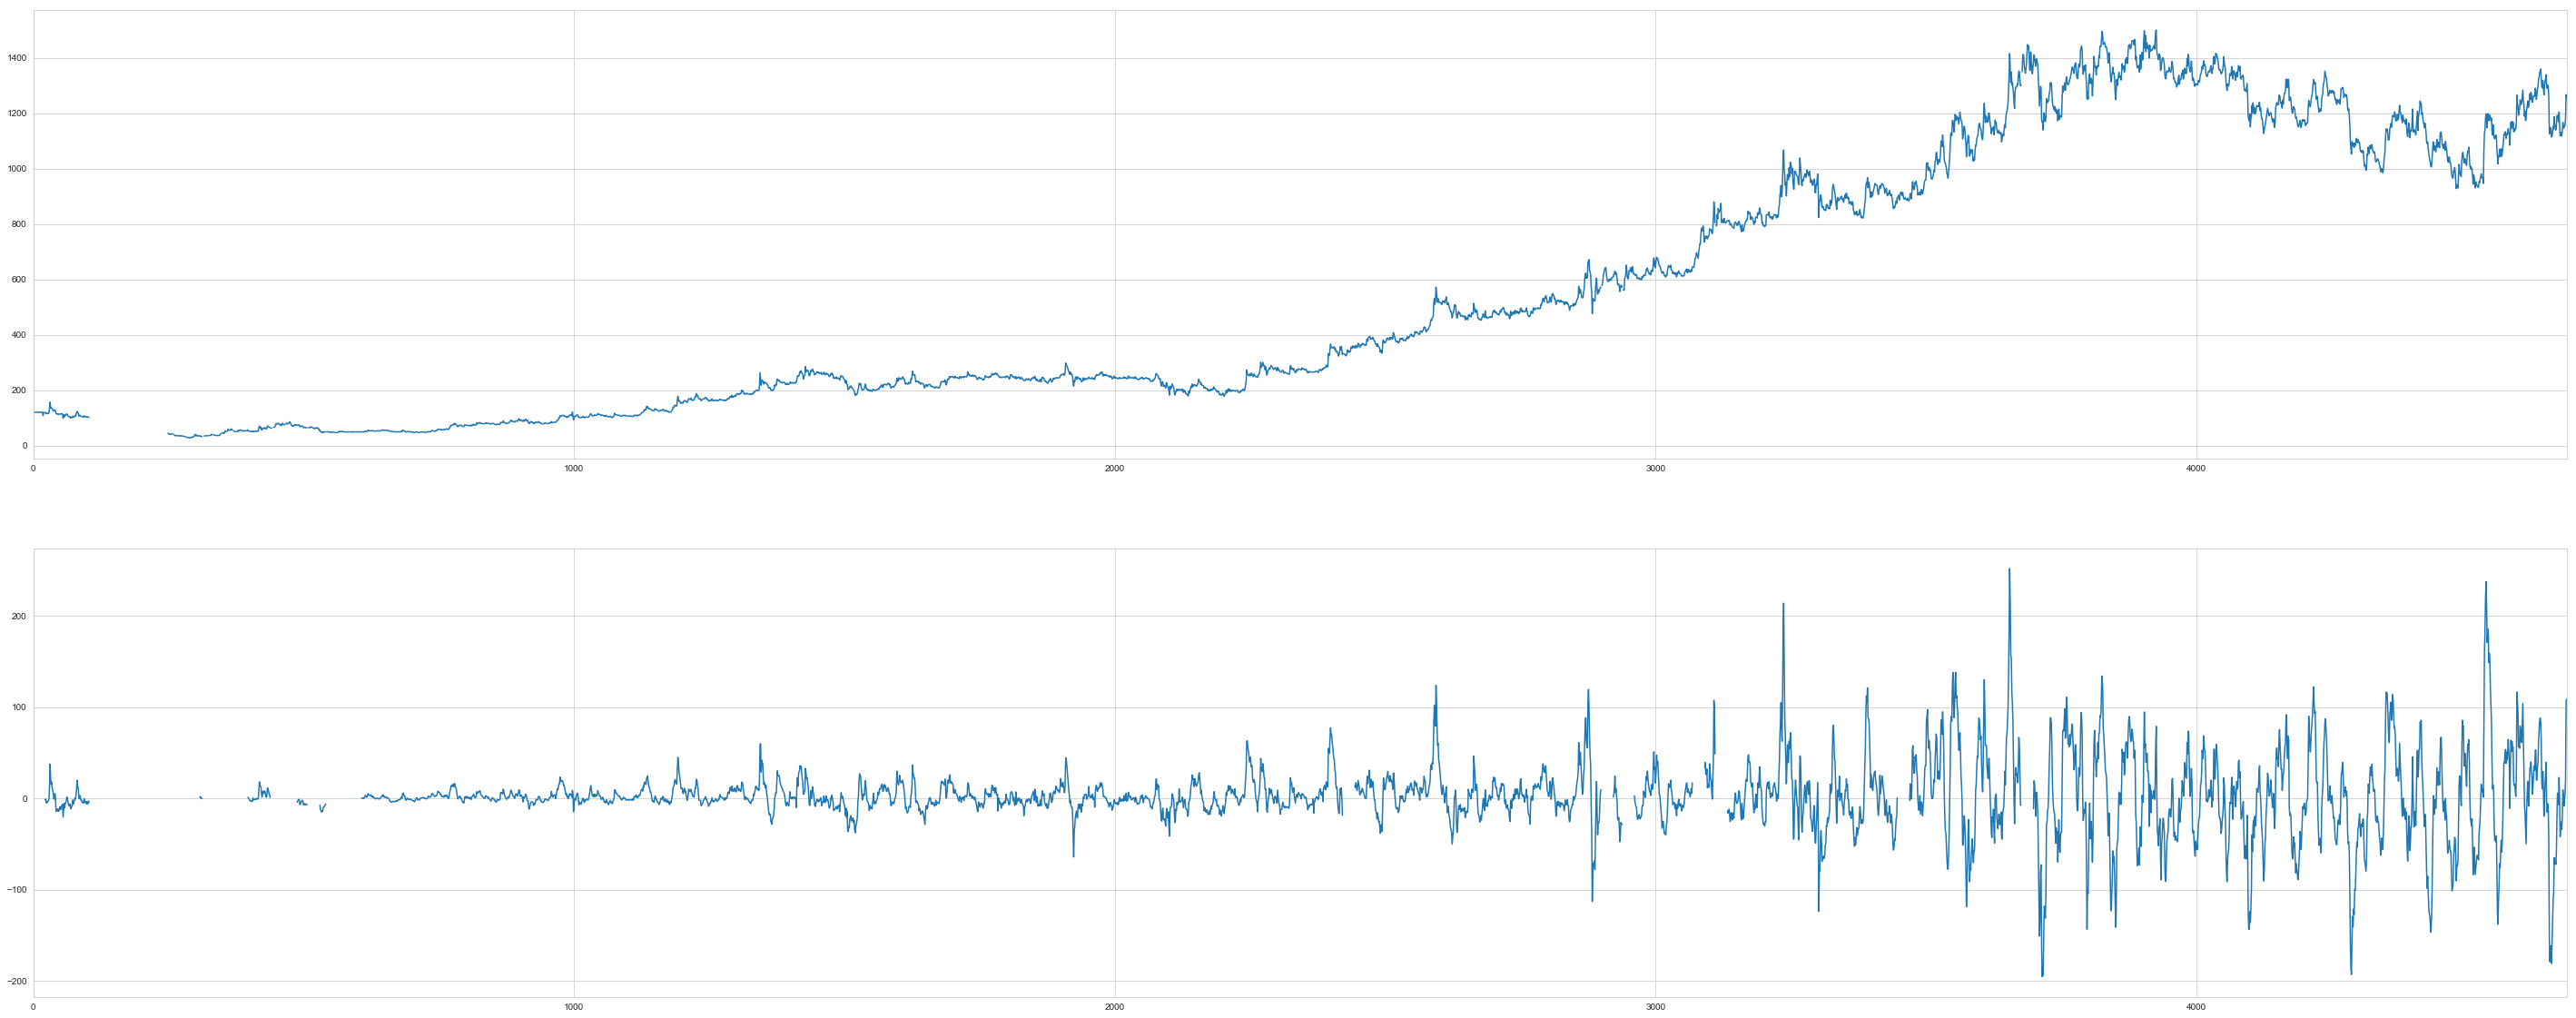

In [23]:
#17 Commodity Channel Index (CCI)
def mad(n,period):
    sum=0
    for i in range(n,n+period+1):
        sum+=abs(NFLX['TP']-NFLX['SMP of TP'])
    return high
NFLX['TP'] = (NFLX['Close']+NFLX['High']+NFLX['Low'])/3
NFLX['SMP of TP'] = NFLX['TP'].rolling(emaPeriod).mean()
MAD = np.array([])
MAD = np.append(MAD,[np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    su = mad(i,emaPeriod)
    MAD = np.append(MAD,su/float(emaPeriod))
NFLX['MAD of TP'] = MAD
NFLX['CCI'] = (NFLX['TP'] - NFLX['SMP of TP'])/(0.015*NFLX['MAD of TP'])
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['CCI'].plot(subplots=False,figsize=(50,20))

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


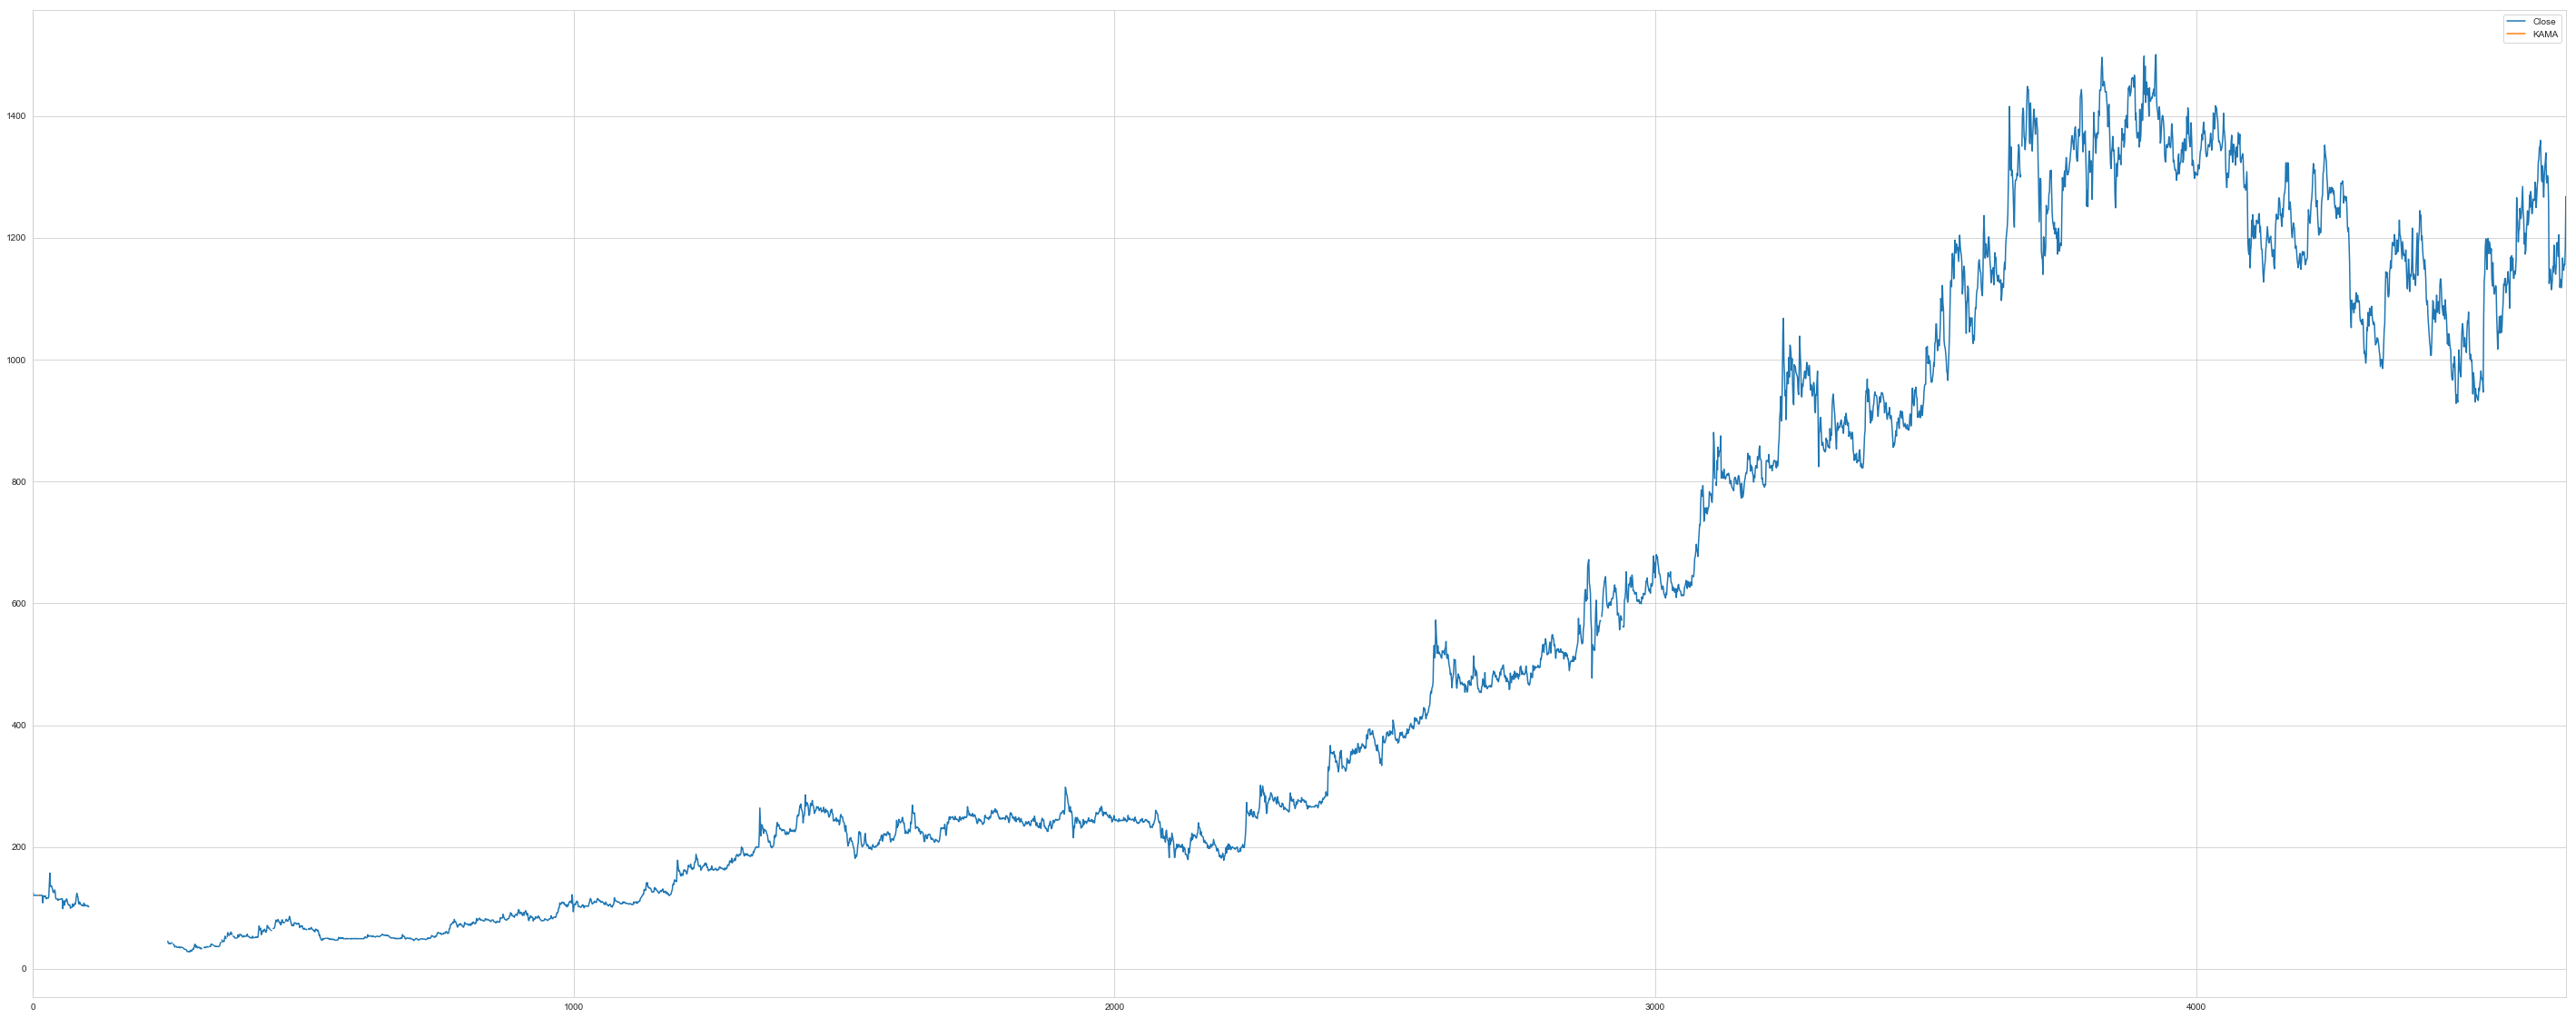

In [24]:
#18 Kaufman's Adaptive Moving Average (KAMA)
KAMA = np.array([])
KAMA = np.append(KAMA,[np.nan]*9)
KAMA = np.append(KAMA,NFLX['Close'][9])
Volitality = np.array([])
Volitality = np.append(Volitality, np.nan)
for i in range(1,len(NFLX['Close'])):
    Volitality = np.append(Volitality, abs(NFLX['Close'][i]-NFLX['Close'][i-1]))
Change = np.array([])
Change = np.append(Change,[np.nan]*10)
for i in range(10,len(NFLX['Close'])):
    Change = np.append(Change, abs(NFLX['Close'][i]-NFLX['Close'][i-10]))
ER = np.array([])
ER = np.append(ER, [np.nan]*10)
for i in range(1,len(NFLX['Close'])-9):
    sum=0;
    for j in range(i,i+9):
        sum+=Volitality[j]
    Val=Change[i+9]/sum
    ER = np.append(ER,Val)
SC = np.array([])
SC = np.append(SC, [np.nan]*10)
for i in range(10,len(NFLX['Close'])):
    slowest = 2.0/3.0
    fastest = 2.0/31.0
    S = pow((ER[i]*(fastest - slowest)+slowest),2)
    SC = np.append(SC, S)
for i in range(10,len(NFLX['Close'])):
    K = KAMA[i-1] + (NFLX['Close'][i]-KAMA[i-1])*SC[i]
    KAMA = np.append(KAMA,K)
NFLX['KAMA'] = KAMA
NFLX[['Close','KAMA']].plot(subplots=False,figsize=(50,20))

In [25]:
# 19 Ultimate oscillator

BP = np.array([])
BP = np.append(BP, np.nan)
for i in range(1,len(NFLX['Close'])):
    BP = np.append(BP, NFLX['Close'][i] - min(NFLX['Close'][i-1],NFLX['Low'][i]))
TR = np.array([])
TR = np.append(TR, np.nan)
for i in range(1,len(NFLX['Close'])):
    TR = np.append(TR, max(NFLX['Close'][i-1],NFLX['High'][i]) - min(NFLX['Close'][i-1],NFLX['Low'][i]))
print(TR)
print(BP)
Average7 = np.array([])
Average14 = np.array([])
Average28 = np.array([])
Average7 = np.append(Average7,[np.nan]*6)
Average14 = np.append(Average14,[np.nan]*13)
Average28 = np.append(Average28,[np.nan]*20)
for i in range (0,len(NFLX['Close'])-7):
    sum1 = 0.0
    sum2 = 0.0
    for j in range (0,7):
        sum1 += TR[i+j]
    for j in range (0,7):
        sum2 += BP[i+j]
    Average7 = np.append(Average7, sum2/sum1)
for i in range (0,len(NFLX['Close'])-14):
    sum1 = 0.0
    sum2 = 0.0
    for j in range (0,14):
        sum1 += TR[i+j]
    for j in range (0,14):
        sum2 += BP[i+j]
    Average14 = np.append(Average14, sum2/sum1)
for i in range (0,len(NFLX['Close'])-21):
    sum1 = 0.0
    sum2 = 0.0
    for j in range (0,21):
        sum1 += TR[i+j]
    for j in range (0,21):
        sum2 += BP[i+j]
    Average28 = np.append(Average28, sum2/sum1)
UO = np.array([]) 
UO = 100 * (4 * Average7 + 2 * Average14 + Average28) / 7
NFLX['UO'] = UO
NFLX[['UO']].plot(subplots=False,figsize=(50,20))   

[      nan  7.5       0.       ... 37.449951 95.5      34.199951]
[      nan  3.125     0.       ... 30.       82.949951  5.900024]


C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


ValueError: Length of values does not match length of index

In [ ]:
NFLX.to_csv("Test.csv", sep=',', encoding='utf-8')

In [56]:
#Correlation
globals()['Samsung'] = DataReader('005930.KS','yahoo',start,end)
globals()['AAPL'] = DataReader('AAPL','yahoo',start,end)
globals()['MSFT'] = DataReader('MSFT','yahoo',start,end)
CP = DataReader(['005930.KS','AAPL','MSFT'], 'yahoo', start, end)['Close']
pct_cg = CP.pct_change()
pct_cg=pct_cg.dropna()
pct_cg.head()

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [ ]:
AAPL['Close'].plot(subplots=False,figsize=(50,20))
MSFT['Close'].plot(subplots=False,figsize=(50,20))

In [ ]:
Samsung['Close'].plot(subplots=False,figsize=(50,20))

In [ ]:
# Comparing Samsung to itself will show a perfectly positive correlaton
sns.jointplot('005930.KS','005930.KS',pct_cg,kind='scatter',color='orange')

In [ ]:
# We'll use joinplot to compare the daily returns of Apple and MS.
sns.jointplot('AAPL','MSFT',pct_cg, kind='scatter',size=8, color='skyblue')

In [ ]:
# We can simply call pairplot ans use it to correlate every feature
sns.pairplot(pct_cg,size=3)

In [ ]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(pct_cg.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [ ]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(CP.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [ ]:
#Risk Analysis Bootstrap Method
sns.distplot(pct_cg['005930.KS'],bins=100)

In [ ]:
pct_cg['005930.KS'].quantile(0.01)

The 0.01 empirical quantile of daily returns is at -0.0356. That means that with 99% confidence, our worst daily loss will not exceed 3.5%. If we have a 1 million dollar investment, our one-day 1% VaR is 0.035 * 1,000,000 = $35,000.

In [ ]:
pct_cg['MSFT'].quantile(0.01)

In [ ]:
pct_cg['AAPL'].quantile(0.01)

In [ ]:
#Monte Carlo Simulation
#for MSFT
days = 260
last_price = CP['MSFT'][-1]
mu = pct_cg.mean()['MSFT']

In [ ]:
def monteCarlo(start_price,days,mu):
    price = np.zeros(days)
    price[0] = start_price
    for x in range(1,days):
        price[x] = price[x-1]*(1+np.random.normal(0,mu))     
    return price

In [ ]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for MSFT')
plt.figure(figsize=(50,20))

In [ ]:
#for AAPL
last_price = CP['AAPL'][-1]
mu = pct_cg.mean()['AAPL']

In [ ]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AAPL')

In [ ]:
#for Samsumg
last_price = CP['005930.KS'][-1]
mu = pct_cg.mean()['005930.KS']

In [ ]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Samsung')

In [ ]:
# Lets Dive Deeper
# For MSFT Stocks
days = 260
last_price = CP['MSFT'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

In [ ]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [ ]:
# for AAPL Stocks
days = 260
last_price = CP['AAPL'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

In [ ]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [ ]:
# for Samsung Stock
last_price = CP['005930.KS'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

In [ ]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [ ]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(Samsung['Close'])

In [ ]:
ts_log = np.log(Samsung['Close'])
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
expwighted_avg = ts_log.ewm(com=11,min_periods =12).mean()
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)

In [ ]:
Features =  pd.read_csv('Features/Features.csv')
Features.head()
#Features = NFLX[['KAMA','CCI','ADL','WilliamsR','STCD','STCK','BullPower','BearPower','FI','CMO','ATR','RSI','MACD','pctB','TEMA','UBB','LBB','EMA of 22 Days','MA for 22 days','ChandelierExitL','Close']]

In [ ]:
np.where(np.isnan(Features['CCI']))

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = Features.iloc[:,0:20]  
y = Features.iloc[:,-1] 
X

In [ ]:
plt.figure(figsize = (100,100))
sns.heatmap(Features.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [ ]:
Features.corr()['Close'].sort_values()

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM